### Imports 
may be 

In [26]:
# standard library imports
import csv
import datetime as dt
import json
import os
import statistics
import time
from ast import literal_eval
import itertools
import time
import re
# third-party imports
import numpy as np
import pandas as pd


# customisations - ensure tables show all columns
pd.set_option("display.max_columns", 500)
# Set the display option to disable scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

### Steamspy data


In [27]:
# steamspy downloaded data
#pd.read_csv('Dane_scrapowanie/steamspy_data.csv').head()

In [28]:
##################################### data ###################################
#steamspy_data = pd.read_csv('Dane_scrapowanie/steamspy_data.csv')

In [29]:
# read in downloaded data
raw_steamspy_data = pd.read_csv('Dane_scrapowanie/steamspy_data.csv')

# print out number of rows and columns
print('Rows:', raw_steamspy_data.shape[0])
print('Columns:', raw_steamspy_data.shape[1])

# view first five rows
raw_steamspy_data.head()

Rows: 58212
Columns: 20


,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,languages,genre,ccu,tags
0,10,Counter-Strike,Valve,Valve,NaN,214027,5449,0,"10,000,000 .. 20,000,000",13859,1406,198,363,999.00,999.00,0.00,"English, French, German, Italian, Spanish - Sp...",Action,11546,"{'Action': 5442, 'FPS': 4855, 'Multiplayer': 3..."
1,20,Team Fortress Classic,Valve,Valve,NaN,6319,979,0,"5,000,000 .. 10,000,000",972,0,13,0,499.00,499.00,0.00,"English, French, German, Italian, Spanish - Sp...",Action,98,"{'Action': 757, 'FPS': 318, 'Multiplayer': 271..."
2,30,Day of Defeat,Valve,Valve,NaN,5588,618,0,"5,000,000 .. 10,000,000",866,0,25,0,499.00,499.00,0.00,"English, French, German, Italian, Spanish - Spain",Action,112,"{'FPS': 793, 'World War II': 259, 'Multiplayer..."
3,40,Deathmatch Classic,Valve,Valve,NaN,2164,478,0,"5,000,000 .. 10,000,000",1505,0,9,0,499.00,499.00,0.00,"English, French, German, Italian, Spanish - Sp...",Action,6,"{'Action': 633, 'FPS': 147, 'Classic': 113, 'M..."
4,50,Half-Life: Opposing Force,Gearbox Software,Valve,NaN,16881,856,0,"2,000,000 .. 5,000,000",1041,0,168,0,499.00,499.00,0.00,"English, French, German, Korean",Action,118,"{'FPS': 902, 'Action': 340, 'Classic': 268, 'S..."


In [30]:
nan_counts = raw_steamspy_data.isna().sum()
print(nan_counts)

appid                  0
name                  10
developer            158
publisher            171
score_rank         58171
positive               0
negative               0
userscore              0
owners                 0
average_forever        0
average_2weeks         0
median_forever         0
median_2weeks          0
price                  4
initialprice           4
discount               4
languages             31
genre                201
ccu                    0
tags                   0
dtype: int64


### Steam main data


In [31]:
##################################### data ###################################
# steam main downloaded data
#pd.read_csv('Dane_scrapowanie/steam_app_data.csv').head() #error

In [32]:
#steam_data = pd.read_csv('Dane_scrapowanie/steam_app_data.csv', low_memory=False)
# read in downloaded data
raw_steam_data = pd.read_csv('Dane_scrapowanie/steam_app_data.csv', low_memory=False)

# print out number of rows and columns
print('Rows:', raw_steam_data.shape[0])
print('Columns:', raw_steam_data.shape[1])

# view first five rows
raw_steamspy_data.head()

Rows: 58212
Columns: 39


,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,languages,genre,ccu,tags
0,10,Counter-Strike,Valve,Valve,NaN,214027,5449,0,"10,000,000 .. 20,000,000",13859,1406,198,363,999.00,999.00,0.00,"English, French, German, Italian, Spanish - Sp...",Action,11546,"{'Action': 5442, 'FPS': 4855, 'Multiplayer': 3..."
1,20,Team Fortress Classic,Valve,Valve,NaN,6319,979,0,"5,000,000 .. 10,000,000",972,0,13,0,499.00,499.00,0.00,"English, French, German, Italian, Spanish - Sp...",Action,98,"{'Action': 757, 'FPS': 318, 'Multiplayer': 271..."
2,30,Day of Defeat,Valve,Valve,NaN,5588,618,0,"5,000,000 .. 10,000,000",866,0,25,0,499.00,499.00,0.00,"English, French, German, Italian, Spanish - Spain",Action,112,"{'FPS': 793, 'World War II': 259, 'Multiplayer..."
3,40,Deathmatch Classic,Valve,Valve,NaN,2164,478,0,"5,000,000 .. 10,000,000",1505,0,9,0,499.00,499.00,0.00,"English, French, German, Italian, Spanish - Sp...",Action,6,"{'Action': 633, 'FPS': 147, 'Classic': 113, 'M..."
4,50,Half-Life: Opposing Force,Gearbox Software,Valve,NaN,16881,856,0,"2,000,000 .. 5,000,000",1041,0,168,0,499.00,499.00,0.00,"English, French, German, Korean",Action,118,"{'FPS': 902, 'Action': 340, 'Classic': 268, 'S..."


In [39]:
nan_counts = raw_steam_data.isna().sum()
print(nan_counts)

type                          94
name                           7
steam_appid                    0
required_age                  94
is_free                       94
controller_support         45829
dlc                        48566
detailed_description         138
about_the_game               138
short_description            135
fullgame                   58212
supported_languages          120
header_image                  94
website                    27286
pc_requirements               94
mac_requirements              94
linux_requirements            94
legal_notice               40353
drm_notice                 57897
ext_user_account_notice    57230
developers                   227
publishers                    94
demos                      53041
price_overview              9749
packages                    7716
package_groups                94
platforms                     94
metacritic                 54424
reviews                    49547
categories                   812
genres    

### Steam charts data - Y

In [40]:
# steam charts scraped data
pd.read_csv('Dane_scrapowanie/data_y.csv').head()

,appid,month,average_x
0,10,2012-07,53967.00
1,10,2012-08,53685.00
2,10,2012-09,55321.00
3,10,2012-10,56053.00
4,10,2012-11,56957.00


In [41]:
steamcharts_data = pd.read_csv('Dane_scrapowanie/data_y.csv')

In [42]:
steamcharts_data.describe()

,appid,average_x
count,1185638.00,1149694.00
mean,658998.83,663.15
std,463017.86,15714.68
min,10.00,0.00
25%,322500.00,1.00
50%,546785.00,7.00
75%,931320.00,44.00
max,2416920.00,3236027.00


In [43]:
len(steamcharts_data)

1185638

In [44]:
nan_counts = steamcharts_data.isna().sum()
print(nan_counts)

appid            0
month        35944
average_x    35944
dtype: int64


# Data cleansing

## STEAMSPY

In [45]:
# standard library imports
from ast import literal_eval
import itertools
# import time
# import re

# third-party imports
import numpy as np
import pandas as pd

# customisations
pd.set_option("display.max_columns", 100)

In [46]:
raw_steamspy_data = pd.read_csv('Dane_scrapowanie/steamspy_data.csv')
raw_steamspy_data.head()

,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,languages,genre,ccu,tags
0,10,Counter-Strike,Valve,Valve,NaN,214027,5449,0,"10,000,000 .. 20,000,000",13859,1406,198,363,999.00,999.00,0.00,"English, French, German, Italian, Spanish - Sp...",Action,11546,"{'Action': 5442, 'FPS': 4855, 'Multiplayer': 3..."
1,20,Team Fortress Classic,Valve,Valve,NaN,6319,979,0,"5,000,000 .. 10,000,000",972,0,13,0,499.00,499.00,0.00,"English, French, German, Italian, Spanish - Sp...",Action,98,"{'Action': 757, 'FPS': 318, 'Multiplayer': 271..."
2,30,Day of Defeat,Valve,Valve,NaN,5588,618,0,"5,000,000 .. 10,000,000",866,0,25,0,499.00,499.00,0.00,"English, French, German, Italian, Spanish - Spain",Action,112,"{'FPS': 793, 'World War II': 259, 'Multiplayer..."
3,40,Deathmatch Classic,Valve,Valve,NaN,2164,478,0,"5,000,000 .. 10,000,000",1505,0,9,0,499.00,499.00,0.00,"English, French, German, Italian, Spanish - Sp...",Action,6,"{'Action': 633, 'FPS': 147, 'Classic': 113, 'M..."
4,50,Half-Life: Opposing Force,Gearbox Software,Valve,NaN,16881,856,0,"2,000,000 .. 5,000,000",1041,0,168,0,499.00,499.00,0.00,"English, French, German, Korean",Action,118,"{'FPS': 902, 'Action': 340, 'Classic': 268, 'S..."


In [47]:
raw_steamspy_data.isna().sum()

appid                  0
name                  10
developer            158
publisher            171
score_rank         58171
positive               0
negative               0
userscore              0
owners                 0
average_forever        0
average_2weeks         0
median_forever         0
median_2weeks          0
price                  4
initialprice           4
discount               4
languages             31
genre                201
ccu                    0
tags                   0
dtype: int64

In [49]:
raw_steamspy_data.columns

Index(['appid', 'name', 'developer', 'publisher', 'score_rank', 'positive',
       'negative', 'userscore', 'owners', 'average_forever', 'average_2weeks',
       'median_forever', 'median_2weeks', 'price', 'initialprice', 'discount',
       'languages', 'genre', 'ccu', 'tags'],
      dtype='object')

#### appid

#### NAME

In [52]:
#name
raw_steamspy_data[raw_steamspy_data['name'].isnull()]

,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,languages,genre,ccu,tags
9170,460250,NaN,Jeroen Wimmers,Jeroen Wimmers,NaN,121,14,0,"0 .. 20,000",14,0,14,0,0.00,0.00,0.00,"English, French, Italian, German, Spanish - Sp...","Casual, Indie",1,"{'Experimental': 90, 'Minimalist': 84, 'Relaxi..."
13103,576960,NaN,Nuclear Tales,NaN,NaN,110,26,0,"20,000 .. 50,000",77,0,77,0,299.00,1499.00,80.00,"English, Spanish - Spain, French, German","Adventure, Casual, Indie, RPG, Simulation, Str...",1,"{'Adventure': 377, 'Choose Your Own Adventure'..."
21156,806160,NaN,Paleno Games,Paleno Games,NaN,6,18,0,"20,000 .. 50,000",0,0,0,0,99.00,99.00,0.00,"English, French, Italian, German, Spanish - Sp...","Action, Adventure, Casual, Indie",0,"{'Action': 22, 'Indie': 22, 'Casual': 21, 'Adv..."
21158,806220,NaN,"Jochen Heizmann, Emmanuel Henné, Intermediaware",Asylum Square,NaN,25,13,0,"20,000 .. 50,000",0,0,0,0,0.00,0.00,0.00,English,"Action, Indie",0,"{'Side Scroller': 102, ""Shoot 'Em Up"": 97, 'Bu..."
26543,965340,NaN,2nd Studio,2nd Studio,NaN,55,7,0,"0 .. 20,000",0,0,0,0,199.00,199.00,0.00,"English, German, Danish, Japanese, Russian, Si...","Action, Indie, Simulation",0,"{'Indie': 34, 'Action': 31, 'Sexual Content': ..."
30044,1071920,NaN,Ultimo Games,Ultimo Games,NaN,19,0,0,"0 .. 20,000",0,0,0,0,399.00,399.00,0.00,English,"Action, Indie",0,"{'Indie': 33, 'Action': 33, 'Retro': 16, 'Arca..."
31472,1116910,NaN,NaN,NaN,NaN,12,16,0,"0 .. 20,000",0,0,0,0,699.00,699.00,0.00,NaN,"Action, Adventure, Casual, Indie, RPG, Simulat...",0,"{'Casual': 33, 'Adventure': 31, 'Indie': 30, '..."
34682,1216770,NaN,NaN,Tender Claws,NaN,1,0,0,"0 .. 20,000",0,0,0,0,0.00,0.00,0.00,"English, French",NaN,0,"{'Casual': 104, 'Indie': 98, 'RPGMaker': 94, '..."
34683,1216780,NaN,NaN,XOCUS,NaN,1,0,0,"0 .. 20,000",0,0,0,0,0.00,0.00,0.00,"English, French",NaN,0,"{'Casual': 144, 'Indie': 138, 'Visual Novel': ..."
51031,1860160,NaN,NaN,TOP5STUDIOS,NaN,2,0,0,"0 .. 20,000",0,0,0,0,0.00,0.00,0.00,English,NaN,0,"{'FPS': 286, 'PvE': 279, 'Shooter': 275, 'Acti..."


In [53]:
# Calculate null value percentages before deletion
null_percentage_before = (raw_steamspy_data['name'].isnull().sum() / len(raw_steamspy_data)) * 100
print(f"Percentage of null values in 'name' before deletion: {null_percentage_before:.2f}%")

# Calculate number of rows before deletion
num_rows_before = len(raw_steamspy_data)
print(f"Number of rows before deletion: {num_rows_before}")

# Remove rows with null 'name'
raw_steamspy_data_2 = raw_steamspy_data[raw_steamspy_data['name'].notnull()]

# Calculate null value percentages after deletion
null_percentage_after = (raw_steamspy_data_2['name'].isnull().sum() / len(raw_steamspy_data_2)) * 100
print(f"Percentage of null values in 'name' after deletion: {null_percentage_after:.2f}%")

# Calculate number of rows after deletion
num_rows_after = len(raw_steamspy_data_2)
print(f"Number of rows after deletion: {num_rows_after}")

# Calculate number of rows deleted
num_rows_deleted = num_rows_before - num_rows_after
print(f"Number of rows deleted: {num_rows_deleted}")


Percentage of null values in 'name' before deletion: 0.02%
Number of rows before deletion: 58212
Percentage of null values in 'name' after deletion: 0.00%
Number of rows after deletion: 58202
Number of rows deleted: 10


#### developers and publishers 
already in second dataset

In [54]:
raw_steamspy_data_3 = raw_steamspy_data_2.drop(columns=['developer', 'publisher']).copy()

#### scorerank
inconsistent, most nan data

In [55]:
raw_steamspy_data_3['score_rank'].value_counts(dropna=False)

NaN       58161
99.00        20
100.00       11
98.00        10
Name: score_rank, dtype: int64

In [56]:
raw_steamspy_data_4 = raw_steamspy_data_3.drop(columns=['score_rank']).copy()

#### positive and negative

In [57]:
raw_steamspy_data_4['positive'].value_counts(dropna=False)

1        4102
2        3272
3        2776
4        2464
5        2020
         ... 
24929       1
10600       1
14730       1
6542        1
2047        1
Name: positive, Length: 4778, dtype: int64

In [58]:
raw_steamspy_data_4['negative'].value_counts(dropna=False)

0        9295
1        6811
2        4514
3        3189
4        2450
         ... 
1421        1
3468        1
1325        1
13611       1
2047        1
Name: negative, Length: 2374, dtype: int64

#### 'userscore'

In [59]:
raw_steamspy_data_4['userscore'].value_counts(dropna=False)

0      58161
95         3
80         2
100        2
46         2
51         2
84         2
68         2
61         1
92         1
94         1
59         1
57         1
88         1
87         1
63         1
55         1
53         1
60         1
65         1
82         1
97         1
96         1
78         1
77         1
76         1
74         1
73         1
71         1
70         1
69         1
67         1
98         1
81         1
Name: userscore, dtype: int64

#### 'owners' 
not needed as we have it in 3rd dataset, at least for now

In [60]:
raw_steamspy_data_4['owners'].isna().sum()

0

In [61]:
raw_steamspy_data_4['owners'].value_counts()

0 .. 20,000                   38858
20,000 .. 50,000               8067
50,000 .. 100,000              4073
100,000 .. 200,000             2778
200,000 .. 500,000             2322
500,000 .. 1,000,000            999
1,000,000 .. 2,000,000          573
2,000,000 .. 5,000,000          357
5,000,000 .. 10,000,000         103
10,000,000 .. 20,000,000         43
20,000,000 .. 50,000,000         21
50,000,000 .. 100,000,000         7
200,000,000 .. 500,000,000        1
Name: owners, dtype: int64

In [62]:
raw_steamspy_data_4[['min_owners', 'max_owners']] = raw_steamspy_data_4['owners'].str.split(' .. ', expand=True)

# Convert the new columns to integers, replacing ',' with nothing
raw_steamspy_data_4['min_owners'] = raw_steamspy_data_4['min_owners'].str.replace(',', '').astype(int)
raw_steamspy_data_4['max_owners'] = raw_steamspy_data_4['max_owners'].str.replace(',', '').astype(int)

print(raw_steamspy_data_4[['min_owners', 'max_owners']])

       min_owners  max_owners
0        10000000    20000000
1         5000000    10000000
2         5000000    10000000
3         5000000    10000000
4         2000000     5000000
...           ...         ...
58207           0       20000
58208           0       20000
58209           0       20000
58210           0       20000
58211           0       20000

[58202 rows x 2 columns]


#### average_forever

In [63]:
raw_steamspy_data_4['average_forever'].value_counts(dropna=False)

0       43040
1         363
3         139
6         117
2         110
        ...  
5585        1
1459        1
1427        1
1395        1
8404        1
Name: average_forever, Length: 2616, dtype: int64

In [64]:
#### average_2weeks

In [65]:
raw_steamspy_data_4['average_2weeks'].value_counts(dropna=False)

0       56277
1         124
2          36
15         25
6          22
        ...  
461         1
333         1
1900        1
1452        1
1375        1
Name: average_2weeks, Length: 682, dtype: int64

In [66]:
raw_steamspy_data_4['median_forever'].value_counts(dropna=False)

0       43040
1         358
3         134
6         111
2         106
        ...  
3660        1
1581        1
1549        1
1517        1
4094        1
Name: median_forever, Length: 2097, dtype: int64

In [67]:
raw_steamspy_data_4['median_2weeks'].value_counts(dropna=False)

0       56277
1         124
2          34
15         27
5          21
        ...  
242         1
2259        1
583         1
647         1
1375        1
Name: median_2weeks, Length: 689, dtype: int64

#### 'price', 'initialprice', 'discount','languages', 'genre'
already provided in second dataset

In [68]:
####ccu could be usefull in the future researches but for now it's just for yesterday so not rly usefull

In [69]:
raw_steamspy_data_4['ccu'].value_counts(dropna=False)

0        41521
1         5177
2         2050
3         1168
4          758
         ...  
11636        1
1457         1
1489         1
3568         1
1103         1
Name: ccu, Length: 1173, dtype: int64

#### tags 
this is already done?

Just by looking at the first row you can see that there are probably going to be far too many tags to include without disrupting the dataset. We have a couple of options here. We could include just the names of the top 3 or 5 tags for a game - which should be easy enough as it looks like the tags are already in order from most votes to least - or we could create new columns for each tag, and the number of votes as the row values.

Because including the full tag information in the dataset may make it bulky and unwieldy, we'll only include the top three tags in the core dataset. As we did when cleaning the Steam Data, we'll also export the full tag data as a separate file. This means that if we want to use it as part of our analysis we can import and merge the data quite easily.
Before we can do that, we have to figure out how to handle and process the data. As we've seen previously, the data in each row is stored as a string containing a dictionary, so we have to use literal_eval to get python to "recognise" the dictionary first.

We also have to figure out how to get a list of all the different unique tags from across the dataset. As each row only contains the tags that it has votes for, we don't know from the outset the tag names or even how many different tags there are.
We could loop through the data and build a list of all the unique tag names using a dictionary or something similar, but instead we'll achieve the same thing much more easily using the chain function from itertools. As seen below, it will take a variety of iterables and unpack them into a single sequence (we have to use list() here to force the generator to evaluate). We can then use the set function to obtain just the unique values from the returned sequence.
As you can see below, we can pass lists, tuples and dictionaries and they will all be handled. Also notice how only the key from the dictionary is returned (d) and not the value inside the key (e). This is really useful and means we can just pass the evaluated tags data as a series, and itertools will just extract the individual keys.

We'll have to add in the AppIDs, but apart from that this makes up the tag data that we'll export. Next we have to figure out how to extract just the top three tags for use in the core dataset.
It turns out this is a relatively simple process. As the keys are in order of highest votes to least, we can just extract the first 3 keys for each row. This may not be the safest approach, as dictionaries don't necessarily preserve key order, but it's fine for our purposes. We can then join these keys on a semicolon to create a list of the tags.

In [70]:
# raw_steamspy_data_4['tags'].value_counts(dropna=False)

In [71]:
tags = raw_steamspy_data_4['tags']

print(tags[0])
tags.head()

{'Action': 5442, 'FPS': 4855, 'Multiplayer': 3412, 'Shooter': 3366, 'Classic': 2799, 'Team-Based': 1875, 'First-Person': 1714, 'Competitive': 1616, 'Tactical': 1354, "1990's": 1208, 'e-sports': 1199, 'PvP': 890, 'Old School': 782, 'Military': 637, 'Strategy': 620, 'Survival': 308, 'Score Attack': 294, '1980s': 274, 'Assassin': 231, 'Nostalgia': 149}


0    {'Action': 5442, 'FPS': 4855, 'Multiplayer': 3...
1    {'Action': 757, 'FPS': 318, 'Multiplayer': 271...
2    {'FPS': 793, 'World War II': 259, 'Multiplayer...
3    {'Action': 633, 'FPS': 147, 'Classic': 113, 'M...
4    {'FPS': 902, 'Action': 340, 'Classic': 268, 'S...
Name: tags, dtype: object

In [72]:
eval_row = literal_eval(tags[0])

print(eval_row['Action'])
print(eval_row['FPS'])

5442
4855


In [73]:
parsed_tags = tags.apply(lambda x: literal_eval(x))

cols = set(itertools.chain(*parsed_tags))

print('Number of unique tags:', len(cols))
print('\nFirst few tags:', sorted(list(cols))[:5])

Number of unique tags: 445

First few tags: ['1980s', "1990's", '2.5D', '2D', '2D Fighter']


In [74]:
import ast

In [75]:
def parse_tags(x):
    x = ast.literal_eval(x)
    
    if isinstance(x, dict):
        return x
    elif isinstance(x, list):
        return {}
    else:
        raise TypeError('Something other than dict or list found')

parsed_tags = tags.apply(parse_tags)

# prepare a dictionary for DataFrame creation
tag_data_dict = {}

for col in sorted(cols):
    # standardise column names
    col_name = col.lower().replace(' ', '_').replace('-', '_').replace("'", "")

    # check if column in row's dictionary of tags and return that value if it is, or 0 if it isn't
    tag_data_dict[col_name] = parsed_tags.apply(lambda x: x[col] if col in x.keys() else 0)

# create DataFrame from dictionary
tag_data = pd.DataFrame(tag_data_dict)

tag_data.head()

,1980s,1990s,2.5d,2d,2d_fighter,2d_platformer,360_video,3d,3d_fighter,3d_platformer,3d_vision,4_player_local,4x,6dof,8_bit_music,atv,abstract,action,action_rpg,action_rts,action_roguelike,action_adventure,addictive,adventure,agriculture,aliens,alternate_history,ambient,america,animation_&_modeling,anime,arcade,archery,arena_shooter,artificial_intelligence,assassin,asymmetric_vr,asynchronous_multiplayer,atmospheric,audio_production,auto_battler,automation,automobile_sim,bmx,base_building,baseball,based_on_a_novel,basketball,battle_royale,beat_em_up,...,top_down,top_down_shooter,touch_friendly,tower_defense,trackir,trading,trading_card_game,traditional_roguelike,trains,transhumanism,transportation,trivia,turn_based,turn_based_combat,turn_based_strategy,turn_based_tactics,tutorial,twin_stick_shooter,typing,underground,underwater,unforgiving,utilities,vr,vr_only,vampire,vehicular_combat,video_production,vikings,villain_protagonist,violent,visual_novel,voice_control,volleyball,voxel,walking_simulator,war,wargame,warhammer_40k,web_publishing,well_written,werewolves,western,wholesome,word_game,world_war_i,world_war_ii,wrestling,zombies,e_sports
0,274,1208,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5442,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,231,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1199
1,0,148,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,757,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,162,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,155,0,0,0,0,0,0,0,0,13,259,0,0,0
3,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,633,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,340,0,0,0,0,0,126,0,189,0,0,0,0,0,0,0,0,0,0,0,0,115,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [76]:
def parse_tags(x):
    x = literal_eval(x)

    if isinstance(x, dict):
        return ';'.join(list(x.keys())[:3])
    else:
        return np.nan
    
tags.apply(parse_tags).head()

0          Action;FPS;Multiplayer
1          Action;FPS;Multiplayer
2    FPS;World War II;Multiplayer
3              Action;FPS;Classic
4              FPS;Action;Classic
Name: tags, dtype: object

In [77]:
raw_steamspy_data_5 = raw_steamspy_data_4.drop(columns=['price','initialprice', 'discount', 'languages', 'genre','ccu']).copy()

In [78]:
raw_steamspy_data_6 = raw_steamspy_data_5.copy()
def parse_tags(x):
    x = literal_eval(x)

    if isinstance(x, dict):
        return ';'.join(list(x.keys())[:3])
    else:
        return np.nan

raw_steamspy_data_6['tags'] = tags.apply(parse_tags)

In [79]:
raw_steamspy_data_6.head()

,appid,name,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,tags,min_owners,max_owners
0,10,Counter-Strike,214027,5449,0,"10,000,000 .. 20,000,000",13859,1406,198,363,Action;FPS;Multiplayer,10000000,20000000
1,20,Team Fortress Classic,6319,979,0,"5,000,000 .. 10,000,000",972,0,13,0,Action;FPS;Multiplayer,5000000,10000000
2,30,Day of Defeat,5588,618,0,"5,000,000 .. 10,000,000",866,0,25,0,FPS;World War II;Multiplayer,5000000,10000000
3,40,Deathmatch Classic,2164,478,0,"5,000,000 .. 10,000,000",1505,0,9,0,Action;FPS;Classic,5000000,10000000
4,50,Half-Life: Opposing Force,16881,856,0,"2,000,000 .. 5,000,000",1041,0,168,0,FPS;Action;Classic,2000000,5000000


In [80]:
raw_steamspy_data_6.isna().sum()

appid               0
name                0
positive            0
negative            0
userscore           0
owners              0
average_forever     0
average_2weeks      0
median_forever      0
median_2weeks       0
tags               45
min_owners          0
max_owners          0
dtype: int64

In [81]:
raw_steamspy_data_6[raw_steamspy_data_6['tags'].isna()==True]

,appid,name,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,tags,min_owners,max_owners
246,8640,RACE On,0,0,0,"100,000 .. 200,000",1,0,1,0,NaN,100000,200000
343,12370,Jagged Alliance 2 Gold,0,0,0,"50,000 .. 100,000",603,0,603,0,NaN,50000,100000
344,12380,Jagged Alliance 2 Gold,0,0,0,"50,000 .. 100,000",0,0,0,0,NaN,50000,100000
508,21110,F.E.A.R.,0,0,0,"1,000,000 .. 2,000,000",216,0,198,0,NaN,1000000,2000000
509,21120,F.E.A.R.,0,0,0,"1,000,000 .. 2,000,000",262,0,298,0,NaN,1000000,2000000
546,23130,Mole Control,0,0,0,"0 .. 20,000",0,0,0,0,NaN,0,20000
547,23140,KrissX,0,0,0,"0 .. 20,000",0,0,0,0,NaN,0,20000
1043,50400,Mafia II - JAPAN,0,0,0,"0 .. 20,000",101,0,101,0,NaN,0,20000
1067,55190,HOMEFRONT [Alpha],0,0,0,"0 .. 20,000",0,0,0,0,NaN,0,20000
1068,55210,HOMEFRONT - Japanese,0,0,0,"0 .. 20,000",0,0,0,0,NaN,0,20000


In [82]:
raw_steamspy_data_6.head()

,appid,name,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,tags,min_owners,max_owners
0,10,Counter-Strike,214027,5449,0,"10,000,000 .. 20,000,000",13859,1406,198,363,Action;FPS;Multiplayer,10000000,20000000
1,20,Team Fortress Classic,6319,979,0,"5,000,000 .. 10,000,000",972,0,13,0,Action;FPS;Multiplayer,5000000,10000000
2,30,Day of Defeat,5588,618,0,"5,000,000 .. 10,000,000",866,0,25,0,FPS;World War II;Multiplayer,5000000,10000000
3,40,Deathmatch Classic,2164,478,0,"5,000,000 .. 10,000,000",1505,0,9,0,Action;FPS;Classic,5000000,10000000
4,50,Half-Life: Opposing Force,16881,856,0,"2,000,000 .. 5,000,000",1041,0,168,0,FPS;Action;Classic,2000000,5000000


In [83]:
raw_steamspy_data_6.drop(columns=['owners'], inplace=True)

In [84]:
raw_steamspy_data_final = raw_steamspy_data_6.copy()

In [85]:
raw_steamspy_data_final.to_csv("Dane_scrapowanie/Final_data/raw_steamspy_data_final.csv", index=False)

## STEAM

In [86]:
nan_counts = raw_steam_data.isna().sum()
print(nan_counts)

type                          94
name                           7
steam_appid                    0
required_age                  94
is_free                       94
controller_support         45829
dlc                        48566
detailed_description         138
about_the_game               138
short_description            135
fullgame                   58212
supported_languages          120
header_image                  94
website                    27286
pc_requirements               94
mac_requirements              94
linux_requirements            94
legal_notice               40353
drm_notice                 57897
ext_user_account_notice    57230
developers                   227
publishers                    94
demos                      53041
price_overview              9749
packages                    7716
package_groups                94
platforms                     94
metacritic                 54424
reviews                    49547
categories                   812
genres    

In [87]:
raw_steam_data.columns

Index(['type', 'name', 'steam_appid', 'required_age', 'is_free',
       'controller_support', 'dlc', 'detailed_description', 'about_the_game',
       'short_description', 'fullgame', 'supported_languages', 'header_image',
       'website', 'pc_requirements', 'mac_requirements', 'linux_requirements',
       'legal_notice', 'drm_notice', 'ext_user_account_notice', 'developers',
       'publishers', 'demos', 'price_overview', 'packages', 'package_groups',
       'platforms', 'metacritic', 'reviews', 'categories', 'genres',
       'screenshots', 'movies', 'recommendations', 'achievements',
       'release_date', 'support_info', 'background', 'content_descriptors'],
      dtype='object')

#### TYPE
We can then look at the type and name columns, thinning out our data set a little by removing apps without either.
In the data collection stage, if no information was returned from an app's API request, only the name and appid was stored. We can easily identify these apps by looking at rows with missing data in the type column, as all other apps have a value here. As seen below, these rows contain no other information so we can safely remove them.

We can look at the counts of unique values in a column by using the pandas Series.value_counts method. By checking the value counts we see that all rows either have a missing value, as noted above, or 'game' in the type column.
Once the null rows are removed, we'll be able to remove this column as it doesn't provide us with any more useful information.

In [88]:
#type <- usuwamy wszystkie, które nie są grami#
x = 'type'

# Calculations before deletion
print("1.Value counts before deletion:")
print(raw_steam_data[x].value_counts(dropna=False))

null_percentage_before = (raw_steam_data[x].isna().sum() / len(raw_steam_data)) * 100
print(f"\nPercentage of null values in {x} before deletion: {null_percentage_before:.2f}%")

dataset_length_before = len(raw_steam_data)
print(f"Length of entire dataset before deletion: {dataset_length_before}")
############################################################################################################
# Removing rows with null values only in 'type' column and filtering to include only 'type' equal to "game"
non_null_data = raw_steam_data.dropna(subset=[x])
non_null_data = non_null_data[non_null_data[x] == 'game']
############################################################################################################
# Calculations after deletion
print("\n2.Value counts after deletion:")
print(non_null_data[x].value_counts(dropna=False))

null_percentage_after = (non_null_data[x].isna().sum() / len(non_null_data)) * 100
print(f"\nPercentage of null values in {x} after deletion: {null_percentage_after:.2f}%")

dataset_length_after = len(non_null_data)
print(f"Length of entire dataset after deletion: {dataset_length_after}")



rows_deleted = dataset_length_before - dataset_length_after
print(f"\nCount of rows deleted: {rows_deleted}")

# Assigning the modified DataFrame to raw_steam_data_2
raw_steam_data_2 = non_null_data.copy()

1.Value counts before deletion:
game        58117
NaN            94
hardware        1
Name: type, dtype: int64

Percentage of null values in type before deletion: 0.16%
Length of entire dataset before deletion: 58212

2.Value counts after deletion:
game    58117
Name: type, dtype: int64

Percentage of null values in type after deletion: 0.00%
Length of entire dataset after deletion: 58117

Count of rows deleted: 95


#### NAME + APPID
Taking a look now at the name column, we can check for rows which either have a null value or a string containing 'none'. This isn't recognised as a null value but should be treated as such.
We achieve this by combining boolean filters using brackets and a vertical bar, |, symbolising a logical 'or'.
There are only four rows which match these criteria, and they appear to be missing a lot of data in other columns so we should definitely remove them.

As we know for certain that all AppIDs should be unique, any rows with the same ID need to be handled.
We can easily view duplicated rows using the DataFrame.duplicated() method of pandas. We can pass keep=False to view all duplicated rows, or leave the defaults (keep='first') to skip over the first row and just show the rest of the duplicates. We can also pass a column label into subset if we want to filter by a single column.
As we only want to remove the extra rows, we can keep the default behaviour.

In [89]:
#name - nazwa gry#
x = 'name'

# Calculations before deletion
print("1.Value counts before deletion:")
print(raw_steam_data_2[x].value_counts(dropna=False))

null_percentage_before = (raw_steam_data_2[x].isna().sum() / len(raw_steam_data_2)) * 100
print(f"\nPercentage of null values in {x} before deletion: {null_percentage_before:.2f}%")

dataset_length_before = len(raw_steam_data_2)
print(f"Length of entire dataset before deletion: {dataset_length_before}")

# Removing rows with null values or 'none' in 'name' column
non_null_data = raw_steam_data_2.dropna(subset=[x])
non_null_data = non_null_data[~non_null_data[x].str.contains('none', case=False, na=False)]

# Removing duplicated rows based on 'AppID' column
non_null_data = non_null_data.drop_duplicates(subset='steam_appid')

# Calculations after deletion
print("\n2.Value counts after deletion:")
print(non_null_data[x].value_counts(dropna=False))

null_percentage_after = (non_null_data[x].isna().sum() / len(non_null_data)) * 100
print(f"\nPercentage of null values in {x} after deletion: {null_percentage_after:.2f}%")

dataset_length_after = len(non_null_data)
print(f"Length of entire dataset after deletion: {dataset_length_after}")

rows_deleted = dataset_length_before - dataset_length_after
print(f"\nCount of rows deleted: {rows_deleted}")

# Assigning the modified DataFrame to raw_steam_data_3
raw_steam_data_3 = non_null_data.copy()

1.Value counts before deletion:
NaN                               7
Alone                             5
Hide and Seek                     4
Bounce                            4
Dodge                             4
                                 ..
Monster of Nyum                   1
Tharsis                           1
Chimpact 1 - Chuck's Adventure    1
VR STOCK CAR RACERS               1
Fugue in Void                     1
Name: name, Length: 57801, dtype: int64

Percentage of null values in name before deletion: 0.01%
Length of entire dataset before deletion: 58117

2.Value counts after deletion:
Alone                             5
Bounce                            4
Lost                              4
Space Survival                    4
Dodge                             4
                                 ..
Tharsis                           1
Chimpact 1 - Chuck's Adventure    1
VR STOCK CAR RACERS               1
Black Viper: Sophia's Fate        1
Fugue in Void                     

In [90]:
#steam_appid <- użyliśmy w poprzednim kodzie także jest już prawidłowe#
x = 'steam_appid'
print(raw_steam_data_3[x].value_counts(dropna=False))
null_percentage = (raw_steam_data_3[x].isna().sum() / len(raw_steam_data_3)) * 100
print(f"Percentage of null values in {x}: {null_percentage:.2f}%")

655360     1
792680     1
935970     1
1603460    1
1206310    1
          ..
1613190    1
847240     1
587840     1
1119600    1
1708030    1
Name: steam_appid, Length: 58088, dtype: int64
Percentage of null values in steam_appid: 0.00%


#### REQUIRED_AGE
Next we'll look at the required_age column. By looking at the value counts we can see that values are already stored as integers, and the values range from 0 to 20, with one likely error (1818). There are no missing values in this column, but the vast majority have a value of 0. We'll clean the column anyway, but this probably means it won't be of much use in analysis as there is little variance in the data.

Whilst fairly useful in its current state, we may benefit from reducing the number of categories that ages fall into. For example, instead of comparing games rated as 5, 6, 7 or 8, we could compare games rated 5+ or 8+.
To decide which categories (or bins) we should use, we will look at the PEGI age ratings as this is the system used in the United Kingdom, where we're performing our analysis. Ratings fall into one of five categories (3, 7, 12, 16, 18), defining the minimum age recommended to play a game.
Using this to inform our decision, we can use the pandas.cut function to sort our data into each of these categories. Rows with 0 may mean they are unrated, unstated as in missing, or rated as suitable for everyone. Because we can't tell we'll leave these as they are. As the erroneous row (1818) is most likely meant to be rated 18 anyway, we can set the upper bound above this value to catch it inside this category.

In [92]:
#required_age#
x = 'required_age'

# Replace '17+' with 17 and convert the entire column to numeric values
raw_steam_data_3[x] = raw_steam_data_3[x].replace('17+', '17')
raw_steam_data_3[x] = pd.to_numeric(raw_steam_data_3[x])

# Calculations before processing
print("1.Value counts before processing:")
print(raw_steam_data_3[x].value_counts(dropna=False).sort_index())

null_percentage_before = (raw_steam_data_3[x].isna().sum() / len(raw_steam_data_3)) * 100
print(f"\nPercentage of null values in {x} before processing: {null_percentage_before:.2f}%")

dataset_length_before = len(raw_steam_data_3)
print(f"Length of entire dataset before processing: {dataset_length_before}")

# Processing age column
cut_points = [-1, 0, 3, 7, 12, 16, 2000]
label_values = [0, 3, 7, 12, 16, 18]
raw_steam_data_3[x] = pd.cut(raw_steam_data_3[x], bins=cut_points, labels=label_values)

# Calculations after processing
print("\n2.Value counts after processing:")
print(raw_steam_data_3[x].value_counts(dropna=False).sort_index())

null_percentage_after = (raw_steam_data_3[x].isna().sum() / len(raw_steam_data_3)) * 100
print(f"\nPercentage of null values in {x} after processing: {null_percentage_after:.2f}%")

dataset_length_after = len(raw_steam_data_3)
print(f"Length of entire dataset after processing: {dataset_length_after}")

# Assigning the modified DataFrame to raw_steam_data_4
raw_steam_data_4 = raw_steam_data_3.copy()


1.Value counts before processing:
0     57134
3        17
7        19
12      111
16      322
18      485
Name: required_age, dtype: int64

Percentage of null values in required_age before processing: 0.00%
Length of entire dataset before processing: 58088

2.Value counts after processing:
0     57134
3        17
7        19
12      111
16      322
18      485
Name: required_age, dtype: int64

Percentage of null values in required_age after processing: 0.00%
Length of entire dataset after processing: 58088


#### is_free

If game is free select 1, otherwise 0

In [93]:
#is_free <- one hot encoding później#
x = 'is_free'
print(raw_steam_data_4[x].value_counts(dropna=False))
null_percentage = (raw_steam_data_4[x].isna().sum() / len(raw_steam_data_4)) * 100
print(f"Percentage of null values in {x}: {null_percentage:.2f}%")
dataset_length_after = len(raw_steam_data_4)
print(f"Length of entire dataset after processing: {dataset_length_after}")

False    52729
True      5359
Name: is_free, dtype: int64
Percentage of null values in is_free: 0.00%
Length of entire dataset after processing: 58088


#### controller_support

console controller support 1- full 0- not full

In [96]:
x = 'controller_support'

# Calculations before replacement
print("1.Value counts before replacement:")
print(raw_steam_data_4[x].value_counts(dropna=False))

null_percentage_before = (raw_steam_data_4[x].isna().sum() / len(raw_steam_data_4)) * 100
print(f"\nPercentage of null values in {x} before replacement: {null_percentage_before:.2f}%")

# Replacing null values with 'not_full'
raw_steam_data_4[x].fillna(0, inplace=True)
# Replacing specific non-null values with 'not_full'
raw_steam_data_4[x].replace('full', 1, inplace=True)

# Calculations after replacement
print("\n2.Value counts after replacement:")
print(raw_steam_data_4[x].value_counts(dropna=False))

null_percentage_after = (raw_steam_data_4[x].isna().sum() / len(raw_steam_data_4)) * 100
print(f"\nPercentage of null values in {x} after replacement: {null_percentage_after:.2f}%")

# Assigning the modified DataFrame to raw_steam_data_5
raw_steam_data_5 = raw_steam_data_4.copy()
# Length of dataset
dataset_length_after = len(raw_steam_data_5)
print(f"\nLength of entire dataset after processing: {dataset_length_after}")

1.Value counts before replacement:
0    45709
1    12379
Name: controller_support, dtype: int64

Percentage of null values in controller_support before replacement: 0.00%

2.Value counts after replacement:
0    45709
1    12379
Name: controller_support, dtype: int64

Percentage of null values in controller_support after replacement: 0.00%

Length of entire dataset after processing: 58088


#### DLC 

does it have dlc? If no make it 0

In [98]:
#dlc#
x = 'dlc'
# Define a function to apply on the 'dlc' column
def process_dlc_value(value):
    if pd.isna(value):
        return 0
    else:
        return 1

# Create a copy of the DataFrame
raw_steam_data_6 = raw_steam_data_5.copy()

# Apply the function to the 'dlc' column
raw_steam_data_6['dlc'] = raw_steam_data_6['dlc'].apply(process_dlc_value)

# Change NaN values in 'dlc' column to 0
raw_steam_data_6['dlc'].fillna(0, inplace=True)

# Print the value counts of 'dlc' to check the distribution
print(raw_steam_data_6['dlc'].value_counts(dropna=False))
null_percentage = (raw_steam_data_6[x].isna().sum() / len(raw_steam_data_6)) * 100
print(f"Percentage of null values in {x}: {null_percentage:.2f}%")
dataset_length_after = len(raw_steam_data_6)
print(f"\nLength of entire dataset after processing: {dataset_length_after}")

0    48446
1     9642
Name: dlc, dtype: int64
Percentage of null values in dlc: 0.00%

Length of entire dataset after processing: 58088


In [99]:
raw_steam_data_6[raw_steam_data_6['dlc']==1]

,type,name,steam_appid,required_age,is_free,controller_support,dlc,detailed_description,about_the_game,short_description,fullgame,supported_languages,header_image,website,pc_requirements,mac_requirements,linux_requirements,legal_notice,drm_notice,ext_user_account_notice,developers,publishers,demos,price_overview,packages,package_groups,platforms,metacritic,reviews,categories,genres,screenshots,movies,recommendations,achievements,release_date,support_info,background,content_descriptors
6,game,Half-Life,70,0,False,0,1,Named Game of the Year by over 50 publications...,Named Game of the Year by over 50 publications...,Named Game of the Year by over 50 publications...,NaN,"English<strong>*</strong>, French<strong>*</st...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.half-life.com/,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",NaN,NaN,NaN,['Valve'],['Valve'],NaN,"{'currency': 'PLN', 'initial': 3599, 'final': ...","[34, 292347]","[{'name': 'default', 'title': 'Buy Half-Life',...","{'windows': True, 'mac': True, 'linux': True}","{'score': 96, 'url': 'https://www.metacritic.c...",NaN,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",NaN,{'total': 71624},NaN,"{'coming_soon': False, 'date': '8 Nov, 1998'}","{'url': 'http://steamcommunity.com/app/70', 'e...",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [], 'notes': None}"
9,game,Half-Life 2,220,0,False,0,1,1998. HALF-LIFE sends a shock through the game...,1998. HALF-LIFE sends a shock through the game...,1998. HALF-LIFE sends a shock through the game...,NaN,"English<strong>*</strong>, French<strong>*</st...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.half-life2.com,{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,[],NaN,NaN,NaN,['Valve'],['Valve'],"[{'appid': 219, 'description': ''}]","{'currency': 'PLN', 'initial': 4599, 'final': ...","[289444, 36, 469]","[{'name': 'default', 'title': 'Buy Half-Life 2...","{'windows': True, 'mac': True, 'linux': True}","{'score': 96, 'url': 'https://www.metacritic.c...",NaN,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...","[{'id': 904, 'name': 'Half-Life 2 Trailer', 't...",{'total': 126732},"{'total': 33, 'highlighted': [{'name': 'Defian...","{'coming_soon': False, 'date': '16 Nov, 2004'}","{'url': 'http://steamcommunity.com/app/220', '...",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [], 'notes': None}"
16,game,Half-Life 2: Episode One,380,0,False,0,1,Half-Life 2 has sold over 4 million copies wor...,Half-Life 2 has sold over 4 million copies wor...,Half-Life 2 has sold over 4 million copies wor...,NaN,"English<strong>*</strong>, French<strong>*</st...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://ep1.half-life2.com/,{'minimum': '\r\n\t\t\t<p><strong>Minimum: </s...,{'minimum': '<strong>Minimum: </strong>OS X ve...,[],NaN,NaN,NaN,['Valve'],['Valve'],NaN,"{'currency': 'PLN', 'initial': 3699, 'final': ...","[79, 469]","[{'name': 'default', 'title': 'Buy Half-Life 2...","{'windows': True, 'mac': True, 'linux': True}","{'score': 87, 'url': 'https://www.metacritic.c...",NaN,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...","[{'id': 912, 'name': 'HL2:EP1 Launch Teaser 1'...",{'total': 19963},"{'total': 13, 'highlighted': [{'name': 'Watch ...","{'coming_soon': False, 'date': '1 Jun, 2006'}","{'url': '', 'email': ''}",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [], 'notes': None}"
17,game,Portal,400,0,False,0,1,<p>Portal&trade; is a new single player game f...,<p>Portal&trade; is a new single player game f...,Portal&trade; is a new single 

#### Wszystkie poniżej do usunięcia do markdowna

In [69]:
#'detailed_description' <- wyrzucamy, nie robimy analizy sentymentu bądź innych związanych z tym czynności nap otrzeby naszego badania#
x = 'detailed_description'
#print(raw_steam_data[x].value_counts())
null_percentage = (raw_steam_data[x].isna().sum() / len(raw_steam_data)) * 100
print(f"Percentage of null values in {x}: {null_percentage:.2f}%")

Percentage of null values in detailed_description: 0.24%


In [70]:
#about_the_game <- wyrzucamy, nie robimy analizy sentymentu bądź innych związanych z tym czynności nap otrzeby naszego badania#
x = 'about_the_game'
#print(raw_steam_data[x].value_counts())
null_percentage = (raw_steam_data[x].isna().sum() / len(raw_steam_data)) * 100
print(f"Percentage of null values in {x}: {null_percentage:.2f}%")

Percentage of null values in about_the_game: 0.24%


In [71]:
#'short_description' <- wyrzucamy, nie robimy analizy sentymentu bądź innych związanych z tym czynności nap otrzeby naszego badania#
x = 'short_description'
#print(raw_steam_data[x].value_counts())
null_percentage = (raw_steam_data[x].isna().sum() / len(raw_steam_data)) * 100
print(f"Percentage of null values in {x}: {null_percentage:.2f}%")

Percentage of null values in short_description: 0.23%


In [72]:
#'fullgame' <- wyrzucamy, nie robimy analizy sentymentu bądź innych związanych z tym czynności nap otrzeby naszego badania#
x = 'fullgame'
print(raw_steam_data[x].value_counts())
null_percentage = (raw_steam_data[x].isna().sum() / len(raw_steam_data)) * 100
print(f"Percentage of null values in {x}: {null_percentage:.2f}%")


Series([], Name: fullgame, dtype: int64)
Percentage of null values in fullgame: 100.00%


#### Markdown kończący

#### supported_languages

Beyond that, the next column is supported_languages. As we will be performing the analysis for an English company, we will only be interested in games available in English. Whilst we could remove non-english game at this stage, instead we will create a column marking english games with a boolean value - True or False.

Taking a closer look at these apps, it doesn't look like there's anything wrong with them. It may be that the data simply wasn't supplied. As there are only 4 rows affected we will go ahead and remove these from the data set.

Next we'll take a look at the structure of the column. By looking at the value for the first row and the values for the most common rows, it looks like languages are stored as a string which can be anything from a comma-separated list of languages to a mix of html and headings. It seems reasonably safe to assume that if the app is in English, the word English will appear somewhere in this string. With this in mind we can simply search the string and return a value based on the result.

It looks like English-only games make up a little over half the rows in our dataset (~16,000), and English plus other languages make up many more. We could create columns for any of the other languages by string searching, but for simplicity we'll focus on just the English ones.
Using the Series.apply method once again, we can check if the string 'english' appears in each row. We'll return a 1 if 'english' is found and 0 otherwise. Whilst we could use True/False, a binary 1/0 can be interpreted as a boolean value and saves a little space in the csv file.
Inside the lambda function, the variable x will take on the value of each row as the expression is evaluated. We apply the lower() string method so capitalisation doesn't matter.

Before moving on, we can take a quick look at the results and see that most of the apps support English.

In [100]:
#'supported_languages'#
x = 'supported_languages'

# Calculations before deletion
print("1. Value counts before deletion:")
print(raw_steam_data_6[x].value_counts(dropna=False))

null_percentage_before = (raw_steam_data_6[x].isna().sum() / len(raw_steam_data_6)) * 100
print(f"\nPercentage of null values in {x} before deletion: {null_percentage_before:.2f}%")

# Count and store the number of nulls
nulls_deleted = raw_steam_data_6[x].isnull().sum()

# Delete rows with null values
raw_steam_data_7 = raw_steam_data_6.dropna(subset=[x])

# Calculations after deletion
print("\n2. Value counts after deletion:")
print(raw_steam_data_7[x].value_counts(dropna=False))

null_percentage_after = (raw_steam_data_7[x].isna().sum() / len(raw_steam_data_7)) * 100
print(f"\nPercentage of null values in {x} after deletion: {null_percentage_after:.2f}%")

# Length of dataset before deletion
dataset_length_before = len(raw_steam_data_6)

# Length of dataset after deletion
dataset_length_after = len(raw_steam_data_7)

# Print the number of nulls deleted and dataset lengths
print(f"\nNumber of nulls deleted: {nulls_deleted}")
print(f"Length of entire dataset before deletion: {dataset_length_before}")
print(f"Length of entire dataset after processing: {dataset_length_after}")

1. Value counts before deletion:
English                                                                                                                                                                                                                                                                                                       16265
English<strong>*</strong><br><strong>*</strong>languages with full audio support                                                                                                                                                                                                                              14099
English, Russian                                                                                                                                                                                                                                                                                               1276
English, Simplified Chinese                

In [101]:
def process_language(df):
    """Process supported_languages column into a boolean 'is english' column."""
    df = df.copy()
    
    # drop rows with missing language data
    df = df.dropna(subset=['supported_languages'])
    
    df['english'] = df['supported_languages'].apply(lambda x: 1 if 'english' in x.lower() else 0)
    df = df.drop('supported_languages', axis=1)
    
    return df


raw_steam_data_8 = process_language(raw_steam_data_7)
raw_steam_data_8[['name', 'english']].head()
raw_steam_data_8['english'].value_counts(dropna=False)

1    56026
0     2037
Name: english, dtype: int64

In [103]:
#'header_image' <- na potrzeby tego badania nie jest to nam potrzebne#
x = 'header_image'
#print(raw_steam_data[x].value_counts())
null_percentage = (raw_steam_data[x].isna().sum() / len(raw_steam_data)) * 100
print(f"Percentage of null values in {x}: {null_percentage:.2f}%")

Percentage of null values in header_image: 0.16%


#### Website -> does it have website provided on page

In [104]:
x = 'website'

# Calculations before modification
print("1. Value counts before modification:")
print(raw_steam_data_8[x].value_counts(dropna=False))

null_percentage_before = (raw_steam_data_8[x].isna().sum() / len(raw_steam_data_8)) * 100
print(f"\nPercentage of null values in {x} before modification: {null_percentage_before:.2f}%")

# Modify the 'website' column
raw_steam_data_8[x].fillna(0, inplace=True)
raw_steam_data_8[x] = raw_steam_data_8[x].apply(lambda val: 1 if val != 0 else val)

# Calculations after modification
print("\n2. Value counts after modification:")
print(raw_steam_data_8[x].value_counts(dropna=False))

null_percentage_after = (raw_steam_data_8[x].isna().sum() / len(raw_steam_data_8)) * 100
print(f"\nPercentage of null values in {x} after modification: {null_percentage_after:.2f}%")

raw_steam_data_9 = raw_steam_data_8.copy()

1. Value counts before modification:
NaN                                                    27161
https://www.facebook.com/8FloorGames/                    221
https://www.choiceofgames.com/                           122
https://store.steampowered.com/publisher/boogygames       62
https://www.facebook.com/DnovelGames/                     61
                                                       ...  
https://www.bigbluebubble.com/foregone                     1
https://discord.gg/wtmavqy                                 1
https://whitethorngames.com/princess-farmer                1
https://cypressinheritance.com/ci-file-9                   1
https://vk.com/illnessintheeast                            1
Name: website, Length: 25848, dtype: int64

Percentage of null values in website before modification: 46.78%

2. Value counts after modification:
1    30902
0    27161
Name: website, dtype: int64

Percentage of null values in website after modification: 0.00%


In [116]:
#'pc_requirements'#
x = 'pc_requirements'
#print(raw_steam_data[x].value_counts())
null_percentage = (raw_steam_data[x].isna().sum() / len(raw_steam_data)) * 100
print(f"Percentage of null values in {x}: {null_percentage:.2f}%")

Percentage of null values in pc_requirements: 0.16%


In [117]:
#'mac_requirements'#
x = 'mac_requirements'
#print(raw_steam_data[x].value_counts())
null_percentage = (raw_steam_data[x].isna().sum() / len(raw_steam_data)) * 100
print(f"Percentage of null values in {x}: {null_percentage:.2f}%")

Percentage of null values in mac_requirements: 0.16%


In [118]:
#'linux_requirements'#
x = 'linux_requirements'
#print(raw_steam_data[x].value_counts())
null_percentage = (raw_steam_data[x].isna().sum() / len(raw_steam_data)) * 100
print(f"Percentage of null values in {x}: {null_percentage:.2f}%")


Percentage of null values in linux_requirements: 0.16%


In [119]:
#'legal_notice' <- może?#
x = 'legal_notice'
#print(raw_steam_data[x].value_counts())
null_percentage = (raw_steam_data[x].isna().sum() / len(raw_steam_data)) * 100
print(f"Percentage of null values in {x}: {null_percentage:.2f}%")

Percentage of null values in legal_notice: 69.32%


In [120]:
#'drm_notice'#
x = 'drm_notice'
#print(raw_steam_data[x].value_counts())
null_percentage = (raw_steam_data[x].isna().sum() / len(raw_steam_data)) * 100
print(f"Percentage of null values in {x}: {null_percentage:.2f}%")

Percentage of null values in drm_notice: 99.46%


In [121]:
#'ext_user_account_notice'#
x = 'ext_user_account_notice'
#print(raw_steam_data[x].value_counts(dropna=False))
null_percentage = (raw_steam_data[x].isna().sum() / len(raw_steam_data)) * 100
print(f"Percentage of null values in {x}: {null_percentage:.2f}%")

Percentage of null values in ext_user_account_notice: 98.31%


#### DEVELOPERS AND PUBLISHERS

We'll skip over the next few columns and take a look at the developers and publishers columns. They will most likely contain similar information so we can look at them together.
We'll start by checking the null counts, noticing that while the publishers column doesn't appear to have any null values, if we search for empty lists we see that we have over 200 'hidden' null values.

Ultimately we want a data set with no missing values. That means we have a few options for dealing with these two columns:
Remove all rows missing either developer or publisher information
Impute missing information by replacing the missing column with the column we have (i.e. if developers is missing, fill it with the value in publishers)
Fill missing information with 'Unknown' or 'None'
We can investigate some of the rows with missing data to help inform our decision.

It appears we are looking at a mix of titles, smaller ones especially, and some of the smaller indie titles may have been self-published. Others simply have wrong or missing data, found by searching for the titles elsewhere. As our priority is creating a clean data set, and there are only a few hundred rows, it will be fine to remove them from the data.
Let's take a look at the structure of the data. Below we inspect some rows near the beginning of the dataframe. It looks like both columns are stored as lists which can have one or multiple values. We'll have to evaluate the rows as before, so they are recognised as lists, then index into them accordingly.

As we have some single values and some multiple, we have to decide how to handle them. Here are some potential solutions:
Create a column for each value in the list (i.e. developer_1, developer_2)
Create a column with the first value in the list and a column with the rest of the values (i.e. developer_1, other_developers)
Create a column with the first value in the list and disregard the rest
Combine all values into one column, simply unpacking the list
Let's begin defining our function, and take a look at how many rows have multiple developers or publishers. After evaluating each row, we can find the length of the lists in each row by using the Series.str.len() method. By filtering only rows where the list has more than one element, we can find the number of rows with more than one value in each column.

It turns out that the vast majority have only one value for these columns. If we went with the first or second solutions above, we'd be left with columns with mostly missing data. We could go with the third option, but the first value in the list isn't necessarily the most important, and this seems unfair if multiple teams were involved.
The best way forward seems to be the fourth option - if there are multiple values we combine them into the same column. We'll create a list in this case, calling str.join() as we did before. If we pass a list with only one value, we get a string with just that value. If we pass a list with multiple values, we get a string-separated list as desired. We can see this below.

We can't join on a comma as a number of developers and publishers have a comma in their name, a couple of which can be seen below.

Instead we can join on a semi-colon (;). We have 3 rows which contain a semi-colon in their name, so we'll remove these. We'll be able to identify and split individual developer/publisher names in the future by handling it this way.

There are also a small number of columns that have ['NA'] or ['N/A'] for publisher. These are some really well hidden null values, and they didn't actually surface until much later in the original development process. This helps highlight the iterative nature of data cleaning - you may discover errors in rows or data that went previously undiscovered, and have to go back and update or correct them.

In [122]:
raw_steam_data_9['developers']

0                         ['Valve']
1                         ['Valve']
2                         ['Valve']
3                         ['Valve']
4              ['Gearbox Software']
                    ...            
58206                ['Takumi Abe']
58207            ['Claypot Studio']
58208    ['Midori Games / みどりげーむず']
58209             ['YenThe Studio']
58211                      ['KAME']
Name: developers, Length: 58063, dtype: object

In [123]:
print('Developers null counts:', raw_steam_data_9 ['developers'].isnull().sum())
print('Developers empty list counts:', raw_steam_data_9 [raw_steam_data_9 ['developers'] == "['']"].shape[0])

print('\nPublishers null counts:', raw_steam_data_9 ['publishers'].isnull().sum())
print('Publishers empty list counts:', raw_steam_data_9 [raw_steam_data_9 ['publishers'] == "['']"].shape[0])

Developers null counts: 116
Developers empty list counts: 0

Publishers null counts: 0
Publishers empty list counts: 329


#### TEST
#def process_developers_and_publishers(df):
    # store initial dataset length
    dataset_length_before = len(df)
    
    # remove rows with missing data in 'developers' column
    df = df[df['developers'].notnull()].copy()
    
    for col in ['developers', 'publishers']:
        # replace empty lists with 'not_provided' in 'publishers' column
        if col == 'publishers':
            df[col] = df[col].apply(lambda x: ["not_provided"] if x == "['']" else literal_eval(x))
        else:
            df[col] = df[col].apply(lambda x: literal_eval(x))
        
        # filter dataframe to rows with lists longer than 1, and store the number of rows
        num_rows = df[df[col].str.len() > 1].shape[0]
        
        print('Rows in {} column with multiple values:'.format(col), num_rows)
   
    # store the length of dataset after processing
    dataset_length_after = len(df)
    
    # print the number of rows deleted and dataset lengths
    print(f"\nNumber of rows deleted: {dataset_length_before - dataset_length_after}")
    print(f"Length of entire dataset before processing: {dataset_length_before}")
    print(f"Length of entire dataset after processing: {dataset_length_after}")
    
    return df

raw_steam_data_10 = process_developers_and_publishers(raw_steam_data_9)

#### opis kolejnej czynności


The process_developers_and_publishers function is designed to clean and transform the developers and publishers columns of a DataFrame df. Here's a step-by-step explanation of what the code does:

Removes rows with missing data: This is achieved by using pandas' .notnull() and boolean indexing. Rows are removed if:

The developers column is null.
The publishers column contains an empty list represented as a string, i.e., "['']".
Removes rows with semicolons in developers or publishers columns: The .str.contains(';') method is used to find rows where the developers or publishers columns contain a semicolon. Rows with semicolons in either of these columns are removed.

Removes rows where publishers is 'NA' or 'N/A': Rows are removed if the publishers column contains "['NA']" or "['N/A']".

Transforms developers and publishers columns: The literal_eval(x) function is used to convert the string representation of lists in these columns back to actual lists. The ';'.join() method is then applied to convert these lists into semicolon-separated strings.

Removes the original developers and publishers columns: The .drop() method is used to remove these original columns from the DataFrame.

Returns the cleaned DataFrame: The function finally returns the cleaned DataFrame.

The last line of the provided code applies this function to the raw_steam_data_9 DataFrame, saving the result to raw_steam_data_10. It then displays the name, steam_appid, developer, and publisher columns of the first few rows of raw_steam_data_10 using the .head() method.






In [124]:
from ast import literal_eval

def process_developers_and_publishers(df):
    # store initial dataset length
    dataset_length_before = len(df)

    # remove rows with missing data in 'developers' column, where 'publishers' is "['NA']" or "['N/A']", 
    # and where 'developers' or 'publishers' contains a semicolon
    df = df[df['developers'].notnull() & 
            (df['publishers'] != "['NA']") & 
            (df['publishers'] != "['N/A']") & 
            ~(df['developers'].astype(str).str.contains(';')) & 
            ~(df['publishers'].astype(str).str.contains(';'))].copy()
    
    for col in ['developers', 'publishers']:
        # replace empty lists with 'not_provided' in 'publishers' column
        if col == 'publishers':
            df[col] = df[col].apply(lambda x: "not_provided" if x == "['']" else ';'.join(literal_eval(x)))
        else:
            df[col] = df[col].apply(lambda x: ';'.join(literal_eval(x)))
        
        # filter dataframe to rows with lists longer than 1, and store the number of rows
        num_rows = df[df[col].str.contains(';')].shape[0]
        
        print('Rows in {} column with multiple values:'.format(col), num_rows)
   
    # store the length of dataset after processing
    dataset_length_after = len(df)
    
    # print the number of rows deleted and dataset lengths
    print(f"\nNumber of rows deleted: {dataset_length_before - dataset_length_after}")
    print(f"Length of entire dataset before processing: {dataset_length_before}")
    print(f"Length of entire dataset after processing: {dataset_length_after}")
    
    return df

raw_steam_data_10 = process_developers_and_publishers(raw_steam_data_9)
raw_steam_data_10[['name', 'steam_appid', 'developers', 'publishers']].head()


Rows in developers column with multiple values: 3809
Rows in publishers column with multiple values: 1980

Number of rows deleted: 139
Length of entire dataset before processing: 58063
Length of entire dataset after processing: 57924


,name,steam_appid,developers,publishers
0,Counter-Strike,10,Valve,Valve
1,Team Fortress Classic,20,Valve,Valve
2,Day of Defeat,30,Valve,Valve
3,Deathmatch Classic,40,Valve,Valve
4,Half-Life: Opposing Force,50,Gearbox Software,Valve


In [125]:
raw_steam_data_10['developers'].value_counts(dropna=False)

Choice of Games               132
Creobit                       128
Laush Dmitriy Sergeevich       97
KOEI TECMO GAMES CO., LTD.     97
Sokpop Collective              91
                             ... 
Iron Ferret Games               1
byDanDans                       1
Team Maniax                     1
Pavrek Games                    1
StudioDobby                     1
Name: developers, Length: 36361, dtype: int64

In [126]:
raw_steam_data_10['publishers'].value_counts(dropna=False)

Big Fish Games    436
not_provided      273
8floor            216
SEGA              165
HH-Games          151
                 ... 
FeatherFan          1
Muso Project        1
Eugene Volik        1
Fat Gem             1
SG Game             1
Name: publishers, Length: 31539, dtype: int64

#### DEMOS
Does have demo

In [127]:
#'demos'#
x = 'demos'
print(raw_steam_data_10[x].value_counts())
null_percentage = (raw_steam_data_10[x].isna().sum() / len(raw_steam_data_10)) * 100
print(f"Percentage of null values in {x}: {null_percentage:.2f}%")

[{'appid': 857830, 'description': ''}]                               3
[{'appid': 653150, 'description': ''}]                               2
[{'appid': 371130, 'description': 'Demo'}]                           2
[{'appid': 513280, 'description': 'Space Rift Demo'}]                2
[{'appid': 200240, 'description': ''}]                               2
                                                                    ..
[{'appid': 1958110, 'description': ''}]                              1
[{'appid': 48280, 'description': ''}]                                1
[{'appid': 604080, 'description': 'Arcane Raise - Aurora Novus'}]    1
[{'appid': 585400, 'description': ''}]                               1
[{'appid': 1647350, 'description': ''}]                              1
Name: demos, Length: 5150, dtype: int64
Percentage of null values in demos: 91.10%


In [128]:
# 'demos' column modification
x = 'demos'

# Modify the 'demos' column
raw_steam_data_10[x].fillna(0, inplace=True)
raw_steam_data_10[x] = raw_steam_data_10[x].apply(lambda val: 0 if val == 0 else 1)

# Calculations after modification
print(raw_steam_data_10[x].value_counts(dropna=False))
null_percentage = (raw_steam_data_10[x].isna().sum() / len(raw_steam_data_10)) * 100
print(f"Percentage of null values in {x}: {null_percentage:.2f}%")

# Save the modified DataFrame to raw_steam_data_11
raw_steam_data_11 = raw_steam_data_10.copy()

0    52767
1     5157
Name: demos, dtype: int64
Percentage of null values in demos: 0.00%


#### price_overview
Whilst we could look at the next column in the dataframe, is_free, it would make sense that this is linked to the price_overview column. Ultimately we may wish to combine these columns into one, where free games would have a price of 0.
Looking at the price_overview column, we can see it is stored in a dictionary-like structure, with multiple keys and values. Handling both of these together might be somewhat trickty, so instead we'll look at a simpler example

It turns out this accounts for most of the missing values in the price_overview column, meaning we can handle these by setting the final price as 0. This makes intuitive sense - free games wouldn't have a price.
This means that there are almost 850 rows which aren't free but have null values in the price_overview column. Let's investigate those next.

The first few rows contain some big, well-known games which appear to have pretty complete data. It looks like we can rule out data errors, so let's dig a little deeper and see if we can find out what is going on.
We'll start by looking at the store pages for some of these titles. The url to an app on the steam website follows this structure:
https://store.steampowered.com/app/[steam_appid]
This means we can easily generate these links using our above filter. We'll wrap it up in a function in case we want to use it later.

Now the preliminary investigation is complete we can begin definining our function.
We start by evaluating the strings using literal_eval as before, however if there is a null value we return a properly formatted dictionary with -1 for the initial value. This will allow us to fill in a value of 0 for free games, then be left with an easily targetable value for the actual null rows.
Next we create currency and price columns from the dictionary in the price_overview column. We define an anonymous function on the fly using a lambda expression, returning the value in each key.

In [129]:
#'price_overview'#
x = 'price_overview'
print(raw_steam_data_11[x].value_counts())
null_percentage = (raw_steam_data_11[x].isna().sum() / len(raw_steam_data_11)) * 100
print(f"Percentage of null values in {x}: {null_percentage:.2f}%")

{'currency': 'PLN', 'initial': 1799, 'final': 1799, 'discount_percent': 0, 'initial_formatted': '', 'final_formatted': '17,99zł'}              5146
{'currency': 'PLN', 'initial': 3599, 'final': 3599, 'discount_percent': 0, 'initial_formatted': '', 'final_formatted': '35,99zł'}              4362
{'currency': 'PLN', 'initial': 359, 'final': 359, 'discount_percent': 0, 'initial_formatted': '', 'final_formatted': '3,59zł'}                 4152
{'currency': 'PLN', 'initial': 719, 'final': 719, 'discount_percent': 0, 'initial_formatted': '', 'final_formatted': '7,19zł'}                 2953
{'currency': 'PLN', 'initial': 1099, 'final': 1099, 'discount_percent': 0, 'initial_formatted': '', 'final_formatted': '10,99zł'}              2700
                                                                                                                                               ... 
{'currency': 'PLN', 'initial': 4699, 'final': 3054, 'discount_percent': 35, 'initial_formatted': '46,99zł', 'fin

In [130]:
raw_steam_data_11['price_overview'].isnull().sum()

9570

In [131]:
free_and_null_price = raw_steam_data_11[(raw_steam_data_11['is_free']) & (raw_steam_data_11['price_overview'].isnull())]

free_and_null_price.shape[0]

5342

In [132]:
not_free_and_null_price = raw_steam_data_11[(raw_steam_data_10['is_free'] == False) & (raw_steam_data_11['price_overview'].isnull())]

not_free_and_null_price.head()

,type,name,steam_appid,required_age,is_free,controller_support,dlc,detailed_description,about_the_game,short_description,fullgame,header_image,website,pc_requirements,mac_requirements,linux_requirements,legal_notice,drm_notice,ext_user_account_notice,developers,publishers,demos,price_overview,packages,package_groups,platforms,metacritic,reviews,categories,genres,screenshots,movies,recommendations,achievements,release_date,support_info,background,content_descriptors,english
14,game,Half-Life 2: Lost Coast,340,0,False,0,0,Originally planned as a section of the Highway...,Originally planned as a section of the Highway...,Originally planned as a section of the Highway...,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,1,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,[],[],NaN,NaN,NaN,Valve,Valve,0,NaN,NaN,[],"{'windows': True, 'mac': True, 'linux': True}",NaN,NaN,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",NaN,{'total': 8847},NaN,"{'coming_soon': False, 'date': '27 Oct, 2005'}","{'url': '', 'email': ''}",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [], 'notes': None}",1
51,game,Final DOOM,2290,0,False,0,0,"<strong>Two New, 32-Level DOOM II Episodes.</s...","<strong>Two New, 32-Level DOOM II Episodes.</s...","Two New, 32-Level DOOM II Episodes. Evilution:...",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,0,{'minimum': '<strong>Minimum: </strong>A 100% ...,[],[],NaN,NaN,NaN,id Software,id Software,0,NaN,NaN,[],"{'windows': True, 'mac': False, 'linux': False}",NaN,NaN,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",NaN,{'total': 1045},NaN,"{'coming_soon': False, 'date': '3 Aug, 2007'}","{'url': '', 'email': ''}",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [], 'notes': None}",1
55,game,Quake II Mission Pack: The Reckoning,2330,0,False,0,0,You are part of an elite commando force that m...,You are part of an elite commando force that m...,You are part of an elite commando force that m...,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,0,{'minimum': '<strong>Minimum: </strong>A 100% ...,[],[],NaN,NaN,NaN,Xatrix Entertainment,id Software,0,NaN,NaN,[],"{'windows': True, 'mac': False, 'linux': False}",NaN,NaN,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",NaN,{'total': 164},NaN,"{'coming_soon': False, 'date': '3 Aug, 2007'}","{'url': '', 'email': ''}",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [], 'notes': None}",1
56,game,Quake II Mission Pack: Ground Zero,2340,0,False,0,0,"Take out the Big Gun sounded simple enough, ex...","Take out the Big Gun sounded simple enough, ex...","Take out the Big Gun sounded simple enough, ex...",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,0,{'minimum': '<strong>Minimum: </strong>A 100% ...,[],[],NaN,NaN,NaN,Rogue Entertainment,id Software,0,NaN,NaN,[],"{'windows': True, 'mac': False, 'linux': False}",NaN,NaN,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",NaN,{'total': 186},NaN,"{'coming_soon': False, 'date': '3 Aug, 2007'}","{'url': '', 'email': ''}",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [], 'notes': None}",1
61,game,The Ship: Single Player,2420,0,False,0,0,For PC gamers who enjoy multiplayer games with...,For PC gamers who enjoy multiplayer games with...,The Ship is a murder mystery alternative to tr...,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,1,{'minimum': '<strong>Minimum:</strong> 1.8 GHz...,[],[],NaN,NaN,NaN,Outerlight Ltd.,Blazing Griffin Ltd.,0,NaN,[56669],"[{'name': 'default', 'title': 'Buy The Ship: S...","{'windows': True, 'mac': False, 'linux': False}",NaN,NaN,"[{'id': 2, 'description': 'Single-player'

In [133]:
def process_price(df):
    df = df.copy()
        
    def parse_price(x):
        if x is not np.nan:
            return literal_eval(x)
        else:
            return {'currency': 'PLN', 'initial': -1}
    
    # evaluate as dictionary and set to -1 if missing
    df['price_overview'] = df['price_overview'].apply(parse_price)
    
    # Create columns from currency and initial values
    df['currency'] = df['price_overview'].apply(lambda x: x['currency'])
    df['price'] = df['price_overview'].apply(lambda x: x['initial'])
    
    # Set price of free games to 0
    df.loc[df['is_free'], 'price'] = 0
    
    return df

price_data = process_price(raw_steam_data_11)[['name', 'currency', 'price']]
price_data.head()

,name,currency,price
0,Counter-Strike,PLN,3599
1,Team Fortress Classic,PLN,1799
2,Day of Defeat,PLN,1799
3,Deathmatch Classic,PLN,1799
4,Half-Life: Opposing Force,PLN,1799


In [134]:
def process_price(df):
    """Process price_overview column into formatted price column."""
    df = df.copy()

    def parse_price(x):
        if x is not np.nan:
            return literal_eval(x)
        else:
            return {'currency': 'PLN', 'initial': -1}

    # evaluate as dictionary and set to -1 if missing
    df['price_overview'] = df['price_overview'].apply(parse_price)

    # create columns from currency and initial values
    df['currency'] = df['price_overview'].apply(lambda x: x['currency'])
    df['price'] = df['price_overview'].apply(lambda x: x['initial'])

    # set price of free games to 0
    df.loc[df['is_free'], 'price'] = 0

    # exchange rates to PLN
    exchange_rates = {
        'GBP': 5.24,
        'USD': 4,
        'EUR': 4.2,
        'AUD': 2.8,
        'BRL': 0.8,
        'SGD': 3.15
    }

    # convert all currencies to PLN
    for currency, exchange_rate in exchange_rates.items():
        df.loc[df['currency'] == currency, 'price'] *= exchange_rate

    # change all currencies to PLN
    df['currency'] = 'PLN'
    
    # change price to display in PLN (only applying to rows with a value greater than 0)
    df.loc[df['price'] > 0, 'price'] /= 100

    # remove columns no longer needed
    df = df.drop(['is_free', 'currency', 'price_overview'], axis=1)

    return df

raw_steam_data_12 = process_price(raw_steam_data_11).copy()
raw_steam_data_12[['name', 'price']].head()

,name,price
0,Counter-Strike,35.99
1,Team Fortress Classic,17.99
2,Day of Defeat,17.99
3,Deathmatch Classic,17.99
4,Half-Life: Opposing Force,17.99


In [135]:
raw_steam_data_12['price'].value_counts().sort_index()

-1.00      4228
0.00       5347
3.24         15
3.25          1
3.26          1
           ... 
1449.00       1
1799.00       1
3005.99       1
4300.00       1
9199.90       1
Name: price, Length: 757, dtype: int64

In [136]:
raw_steam_data_12[raw_steam_data_12['price']==9199.90]

,type,name,steam_appid,required_age,controller_support,dlc,detailed_description,about_the_game,short_description,fullgame,header_image,website,pc_requirements,mac_requirements,linux_requirements,legal_notice,drm_notice,ext_user_account_notice,developers,publishers,demos,packages,package_groups,platforms,metacritic,reviews,categories,genres,screenshots,movies,recommendations,achievements,release_date,support_info,background,content_descriptors,english,price
56222,game,The Hidden and Unknown,2193940,0,0,0,The world is filled with <strong>The Hidden an...,The world is filled with <strong>The Hidden an...,"The Hidden and Unknown is a story-based game, ...",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,1,{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,NaN,NaN,NaN,ProX,ProX,0,[785419],"[{'name': 'default', 'title': 'Buy The Hidden ...","{'windows': True, 'mac': True, 'linux': True}",NaN,NaN,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '25', 'description': 'Adventure'}, {'i...","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...","[{'id': 256913123, 'name': 'Main Trailer', 'th...",NaN,"{'total': 25, 'highlighted': [{'name': 'The Ch...","{'coming_soon': False, 'date': '23 Jan, 2023'}","{'url': 'https://prox.team/', 'email': 'suppor...",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [], 'notes': None}",1,9199.90


#### packages

In [137]:
#'package_groups' <- mamy to w innych kolumnach#
x =  'package_groups'
#print(raw_steam_data[x].value_counts())
null_percentage = (raw_steam_data[x].isna().sum() / len(raw_steam_data)) * 100
print(f"Percentage of null values in {x}: {null_percentage:.2f}%")

Percentage of null values in package_groups: 0.16%


#### platforms
The platforms column appears to contain a key for each of the main operating systems - windows, mac and linux - and a corresponding boolean value, set to True or False depending on the availability on that platform. This should be a reasonably straighforward place to start. We can separate this data out into three columns - one for each platform - filled with boolean values.

So far the cleaning process has been relatively simple, mainly requiring checking for null values and dropping some rows or columns. Already we can see that handling the platforms will be a little more complex.
Our first hurdle is getting python to recognise the data in the columns as dictionaries rather than just strings. This will allow us to access the different values separately, without having to do some unnecessarily complicated string formatting. As we can see below, even though the data looks like a dictionary it is in fact stored as a string.

We can get around this using the handy literal_eval function from the built-in ast module. As the name suggests, this will allow us to evaluate the string, and then index into it as a dictionary.

We also need to check for missing values, but fortunately it appears there aren't any in this column.

As for formatting the output, let's keep things simple and return a list of supported platforms. Another option would be to create a column for each platform with a corresponding True/False value for each row, something we can keep in mind for the future.
We can create the desired list by calling the str.join() method on a string, and passing an iterable into the function. In this case, we can pass the keys of the row, as seen below.

We also need to inspect the value of each row, and only end up with the keys that have a value of True, skipping those which are False. The example below shows how we can do this using a list comprehension.

Putting this all together, we can use the pandas Series.apply method to process the rows.

In [138]:
#'platforms'#
x =  'platforms'
print(raw_steam_data_12[x].value_counts(dropna=False))
null_percentage = (raw_steam_data_12[x].isna().sum() / len(raw_steam_data_12)) * 100
print(f"Percentage of null values in {x}: {null_percentage:.2f}%")

{'windows': True, 'mac': False, 'linux': False}    43287
{'windows': True, 'mac': True, 'linux': True}       6800
{'windows': True, 'mac': True, 'linux': False}      6054
{'windows': True, 'mac': False, 'linux': True}      1770
{'windows': False, 'mac': True, 'linux': False}       10
{'windows': False, 'mac': False, 'linux': True}        2
{'windows': False, 'mac': True, 'linux': True}         1
Name: platforms, dtype: int64
Percentage of null values in platforms: 0.00%


In [139]:
def process_platforms(df):
    """Split platforms column into separate boolean columns for each platform."""
    # evaluate values in platforms column, so can index into dictionaries
    df = df.copy()
    
    def parse_platforms(x):
        
        d = literal_eval(x)
        
        return ';'.join(platform for platform in d.keys() if d[platform])
    
    df['platforms'] = df['platforms'].apply(parse_platforms)
    
    return df


raw_steam_data_13 = process_platforms(raw_steam_data_12)
raw_steam_data_13['platforms'].value_counts(dropna=False)

windows              43287
windows;mac;linux     6800
windows;mac           6054
windows;linux         1770
mac                     10
linux                    2
mac;linux                1
Name: platforms, dtype: int64

#### metacritic

In [140]:
#'metacritic'#
x =  'metacritic'
print(raw_steam_data_13[x].value_counts(dropna=False))
null_percentage = (raw_steam_data_13[x].isna().sum() / len(raw_steam_data_13)) * 100
print(f"Percentage of null values in {x}: {null_percentage:.2f}%")

NaN                                                                                                      54159
{'score': 91, 'url': 'https://www.metacritic.com/game/pc/dragon-age-origins?ftag=MCD-06-10aaa1f'}            2
{'score': 93, 'url': 'https://www.metacritic.com/game/pc/company-of-heroes?ftag=MCD-06-10aaa1f'}             2
{'score': 66, 'url': 'https://www.metacritic.com/game/pc/armada-2526?ftag=MCD-06-10aaa1f'}                   2
{'score': 81, 'url': 'https://www.metacritic.com/game/pc/stronghold?ftag=MCD-06-10aaa1f'}                    2
                                                                                                         ...  
{'score': 86, 'url': 'https://www.metacritic.com/game/pc/injustice-2?ftag=MCD-06-10aaa1f'}                   1
{'score': 83, 'url': 'https://www.metacritic.com/game/pc/europa-universalis-iii?ftag=MCD-06-10aaa1f'}        1
{'score': 73, 'url': 'https://www.metacritic.com/game/pc/rage-2?ftag=MCD-06-10aaa1f'}                        1
{

In [141]:
raw_steam_data_13['metacritic'].apply(type).value_counts()

<class 'float'>    54159
<class 'str'>       3765
Name: metacritic, dtype: int64

In [142]:
import pandas as pd
import ast

# Assuming that 'raw_steam_data_13' is your DataFrame

# Create a copy of raw_steam_data_13
raw_steam_data_14 = raw_steam_data_13.copy()

# Apply a lambda function to each row of the 'metacritic' column
raw_steam_data_14['metacritic_score'] = raw_steam_data_14['metacritic'].apply(
    lambda x: ast.literal_eval(x)['score'] if isinstance(x, str) else "not_provided")

# Now we can drop the original 'metacritic' column
raw_steam_data_14.drop(columns=['metacritic'], inplace=True)

# To check the results
print(raw_steam_data_14['metacritic_score'].value_counts(dropna=False))


not_provided    54159
80                186
76                172
78                169
81                163
                ...  
27                  1
23                  1
33                  1
97                  1
20                  1
Name: metacritic_score, Length: 73, dtype: int64


In [143]:
#'reviews' -> zostawiamy#
x =  'reviews'
#print(raw_steam_data[x].value_counts())
null_percentage = (raw_steam_data[x].isna().sum() / len(raw_steam_data)) * 100
print(f"Percentage of null values in {x}: {null_percentage:.2f}%")

Percentage of null values in reviews: 85.11%


#### Categories and Genres

We will take a look at the categories and genres columns next. Below we take a look at the null counts and structure of the data. Both appear to be a list of dictionaries containing an id and description key-value pair. Similar to our handling of developers and publishers, it may be best to extract just the descriptions into a list for now. We could make a list of the IDs, keeping track of the corresponding description externally, but that seems overly complex for our purposes.

All of the above rows with null categories data are applications or software of some kind, and not actually games. It would definitely be best to remove these, as we are interested in analysing games from the steam store.
Below we take a look at rows with missing genres data. There doesn't seem to be anything wrong with these games, and it suggests that genre data simply wasn't supplied. As there are only x rows affected, we'll remove these rows to keep our dataset complete.

As we did for the developer and publisher columns, we can create an anonymous function and join the results on a semicolon. Inside the function we use a list comprehension to traverse each dictionary and extract the value under the description key, as seen below.


In [144]:
#'categories'#
x =  'categories'
print(raw_steam_data_14[x].value_counts())
null_percentage = (raw_steam_data_14[x].isna().sum() / len(raw_steam_data_14)) * 100
print(f"Percentage of null values in {x}: {null_percentage:.2f}%")

[{'id': 2, 'description': 'Single-player'}]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         13296
[{'id': 2, 'description': 'Single-player'}, {'id': 22, 'description': 'Steam Achievements'}]                                                                                                                                                                                                                                                                                                                                                                  

In [145]:
#'genres'#
x =  'genres'
print(raw_steam_data_14[x].value_counts())
null_percentage = (raw_steam_data_14[x].isna().sum() / len(raw_steam_data_14)) * 100
print(f"Percentage of null values in {x}: {null_percentage:.2f}%")

[{'id': '1', 'description': 'Action'}, {'id': '23', 'description': 'Indie'}]                                                                                                                                                                          3553
[{'id': '4', 'description': 'Casual'}, {'id': '23', 'description': 'Indie'}]                                                                                                                                                                          3031
[{'id': '1', 'description': 'Action'}, {'id': '25', 'description': 'Adventure'}, {'id': '23', 'description': 'Indie'}]                                                                                                                                2856
[{'id': '25', 'description': 'Adventure'}, {'id': '23', 'description': 'Indie'}]                                                                                                                                                                      2

In [146]:
print('Categories:\n')
print('Null values:', raw_steam_data_14['categories'].isnull().sum())
print()
print(raw_steam_data_14['categories'][0])

print('\nGenres:\n')
print('Null values:', raw_steam_data_14['genres'].isnull().sum())
print()
print(raw_steam_data_14['genres'].iloc[0])
print(raw_steam_data_14['genres'].iloc[1000])


Categories:

Null values: 699

[{'id': 1, 'description': 'Multi-player'}, {'id': 49, 'description': 'PvP'}, {'id': 36, 'description': 'Online PvP'}, {'id': 37, 'description': 'Shared/Split Screen PvP'}, {'id': 8, 'description': 'Valve Anti-Cheat enabled'}]

Genres:

Null values: 74

[{'id': '1', 'description': 'Action'}]
[{'id': '4', 'description': 'Casual'}]


In [147]:
#print_steam_links(raw_steam_data_14[raw_steam_data_14['categories'].isnull()].sample(5, random_state=0))

In [148]:
#print_steam_links(raw_steam_data_14[raw_steam_data_14['genres'].isnull()].sample(5, random_state=0))

In [149]:
def process_categories_and_genres(df):
    df = df.copy()
    df = df[(df['categories'].notnull()) & (df['genres'].notnull())]
    
    for col in ['categories', 'genres']:
        df[col] = df[col].apply(lambda x: ';'.join(item['description'] for item in literal_eval(x)))
    
    return df

raw_steam_data_15 = process_categories_and_genres(raw_steam_data_14)
raw_steam_data_15[['steam_appid', 'categories', 'genres']].head()

,steam_appid,categories,genres
0,10,Multi-player;PvP;Online PvP;Shared/Split Scree...,Action
1,20,Multi-player;PvP;Online PvP;Shared/Split Scree...,Action
2,30,Multi-player;Valve Anti-Cheat enabled,Action
3,40,Multi-player;PvP;Online PvP;Shared/Split Scree...,Action
4,50,Single-player;Multi-player;Valve Anti-Cheat en...,Action


In [150]:
#'screenshots'#
x =  'screenshots'
#print(raw_steam_data[x].value_counts())
null_percentage = (raw_steam_data[x].isna().sum() / len(raw_steam_data)) * 100
print(f"Percentage of null values in {x}: {null_percentage:.2f}%")

Percentage of null values in screenshots: 0.28%


In [151]:
#'movies'#
x =  'movies'
#print(raw_steam_data[x].value_counts())
null_percentage = (raw_steam_data[x].isna().sum() / len(raw_steam_data)) * 100
print(f"Percentage of null values in {x}: {null_percentage:.2f}%")

Percentage of null values in movies: 4.38%


#### recommendations

In [152]:
#'recommendations'#
x =  'recommendations'
print(raw_steam_data_15[x].value_counts(dropna=False))
null_percentage = (raw_steam_data_15[x].isna().sum() / len(raw_steam_data_15)) * 100
print(f"Percentage of null values in {x}: {null_percentage:.2f}%")

NaN                 44030
{'total': 102}         65
{'total': 111}         58
{'total': 121}         56
{'total': 107}         56
                    ...  
{'total': 3177}         1
{'total': 6868}         1
{'total': 11985}        1
{'total': 3184}         1
{'total': 2485}         1
Name: recommendations, Length: 4169, dtype: int64
Percentage of null values in recommendations: 77.03%


In [153]:
import pandas as pd
import ast

# Assuming that 'raw_steam_data_15' is your DataFrame

# Create a copy of raw_steam_data_15
raw_steam_data_16 = raw_steam_data_15.copy()

# Apply a lambda function to each row of the 'recommendations' column
raw_steam_data_16['recommendations_total'] = raw_steam_data_16['recommendations'].apply(
    lambda x: ast.literal_eval(x)['total'] if isinstance(x, str) else 0)

# Now we can drop the original 'recommendations' column
raw_steam_data_16.drop(columns=['recommendations'], inplace=True)

# Calculate the percentage of null values in the original 'recommendations' column
null_percentage_before = (raw_steam_data_15['recommendations'].isna().sum() / len(raw_steam_data_15)) * 100
# Calculate the percentage of null values in the original 'recommendations' column
null_percentage_after = (raw_steam_data_16['recommendations_total'].isna().sum() / len(raw_steam_data_16)) * 100

# To check the results
print(raw_steam_data_16['recommendations_total'].value_counts(dropna=False))

# Print the percentage of null values in the 'recommendations' column
print(f"Percentage of null values in recommendations (before): {null_percentage_before:.2f}%")
print(f"\nPercentage of null values in recommendations (before): {null_percentage_after:.2f}%")

0         44030
102          65
111          58
107          56
121          56
          ...  
26333         1
3177          1
9973          1
126732        1
1937          1
Name: recommendations_total, Length: 4169, dtype: int64
Percentage of null values in recommendations (before): 77.03%

Percentage of null values in recommendations (before): 0.00%


#### achievements

The final columns we will take a look at before moving on to export columns are achievements and content_descriptors. Let's take a look at the null counts for each column and a small sample of rows.

It looks like both columns are stored as dictionaries, with standard formats if no details are provided or exist.
Below we take a closer look at a single row from the achievements column.

There are two keys in the top level of the dictionary: otal and highlighted. The highlighted column looks too specific, being a selection of achievements specific to that game, so we will remove it. It may be worthwhile extracting the total value though.
Now let's take a look at the content_descriptors column.

Content descriptors contain age-related warnings about the content of a game. They are identified by a numeric ID number, with optional notes supplied. Almost 26,000 rows have an empty list, indicating either no content descriptors or none provided. We already have the required_age column, which gives us similar information. Because of this, and because the rows are highly specific to each game, we will drop this column entirely.
Let's now define a function, taking a look at the value counts to verify everything went as expected.

In [154]:
#'achievements'#
x =  'achievements'
#print(raw_steam_data[x].value_counts())
null_percentage = (raw_steam_data_16[x].isna().sum() / len(raw_steam_data_16)) * 100
print(f"Percentage of null values in {x}: {null_percentage:.2f}%")

Percentage of null values in achievements: 44.13%


In [155]:
print('Achievements null counts:', raw_steam_data_16['achievements'].isnull().sum())

raw_steam_data_16[['name', 'achievements']].iloc[8:13]

Achievements null counts: 25227


,name,achievements
8,Half-Life: Blue Shift,NaN
9,Half-Life 2,"{'total': 33, 'highlighted': [{'name': 'Defian..."
10,Counter-Strike: Source,"{'total': 147, 'highlighted': [{'name': 'Someo..."
11,Half-Life: Source,NaN
12,Day of Defeat: Source,"{'total': 54, 'highlighted': [{'name': 'Double..."


In [156]:
def process_achievements_and_descriptors(df):
    """Parse as total number of achievements."""
    df = df.copy()
    
    df = df.drop('content_descriptors', axis=1)
    
    def parse_achievements(x):
        if x is np.nan:
            # missing data, assume has no achievements
            return 0
        else:
            # else has data, so can extract and return number under total
            return literal_eval(x)['total']
        
    df['achievements'] = df['achievements'].apply(parse_achievements)
    
    return df

raw_steam_data_17 = process_achievements_and_descriptors(raw_steam_data_16)
raw_steam_data_17['achievements'].value_counts(dropna=False)

0       25876
10       1484
12       1237
20       1092
15       1044
        ...  
143         1
463         1
2638        1
1327        1
4094        1
Name: achievements, Length: 414, dtype: int64

#### RELEASE_DATE

We can explore the data a little further using the value_counts method. Whilst it looks like most dates are in the format dd mmm, yyyy, there at least a couple of rows in the format mmm yyyy, such as 'Jun 2009'. This means that all the dates aren't stored uniformly, so we will have to take care when parsing them.

There are also a number of rows that have a blank string for the date value. We'll have to treat these as missing values, and decide if we want to remove them from the dataset. We can use the imported print_steam_links function to inspect some of the rows, using sample to randomly select a few.

In [157]:
#'release_date'#
x =  'release_date'
print(raw_steam_data_17[x].value_counts())
null_percentage = (raw_steam_data_17[x].isna().sum() / len(raw_steam_data)) * 100
print(f"Percentage of null values in {x}: {null_percentage:.2f}%")

{'coming_soon': False, 'date': '17 Jan, 2020'}    71
{'coming_soon': False, 'date': '30 Mar, 2023'}    62
{'coming_soon': False, 'date': '30 Sep, 2022'}    61
{'coming_soon': False, 'date': '26 Feb, 2021'}    58
{'coming_soon': False, 'date': '14 Oct, 2021'}    57
                                                  ..
{'coming_soon': False, 'date': '30 Jul, 2010'}     1
{'coming_soon': False, 'date': '20 Mar, 2012'}     1
{'coming_soon': False, 'date': '1 Sep, 2014'}      1
{'coming_soon': False, 'date': '19 Dec, 2012'}     1
{'coming_soon': False, 'date': 'Sep 9, 2016'}      1
Name: release_date, Length: 4340, dtype: int64
Percentage of null values in release_date: 0.00%


In [158]:
no_release_date = raw_steam_data_17[raw_steam_data_17['release_date'].str.contains("'date': ''")]

print('Rows with no release date:', no_release_date.shape[0], '\n')

Rows with no release date: 58 



#### Info
It looks like some are special re-releases, like anniversary or game of the year editions, some are early access and not officially released yet, and others simply have a missing date. Apart from that there don't appear to be any clear patterns emerging, so as there are only 26 rows it may be best to remove them.

In [159]:
print(type(raw_steam_data_17['release_date'].iloc[0]))

raw_steam_data_17['release_date'].iloc[0]

<class 'str'>


"{'coming_soon': False, 'date': '1 Nov, 2000'}"

In [160]:
print(type(literal_eval(raw_steam_data_17['release_date'].iloc[0])))

literal_eval(raw_steam_data_17['release_date'].iloc[0])['date']

<class 'dict'>


'1 Nov, 2000'

In [161]:
timestamp = pd.to_datetime(literal_eval(raw_steam_data_17['release_date'].iloc[0])['date'])

print(timestamp)
print(timestamp.year)

pd.to_datetime(literal_eval(raw_steam_data_17['release_date'].iloc[0])['date'], format='%d %b, %Y')

2000-11-01 00:00:00
2000


Timestamp('2000-11-01 00:00:00')

In [162]:
raw_steam_data_17.head()

,type,name,steam_appid,required_age,controller_support,dlc,detailed_description,about_the_game,short_description,fullgame,header_image,website,pc_requirements,mac_requirements,linux_requirements,legal_notice,drm_notice,ext_user_account_notice,developers,publishers,demos,packages,package_groups,platforms,reviews,categories,genres,screenshots,movies,achievements,release_date,support_info,background,english,price,metacritic_score,recommendations_total
0,game,Counter-Strike,10,0,0,0,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,0,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",NaN,NaN,NaN,Valve,Valve,0,"[574941, 7]","[{'name': 'default', 'title': 'Buy Counter-Str...",windows;mac;linux,NaN,Multi-player;PvP;Online PvP;Shared/Split Scree...,Action,"[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",NaN,0,"{'coming_soon': False, 'date': '1 Nov, 2000'}","{'url': 'http://steamcommunity.com/app/10', 'e...",https://cdn.akamai.steamstatic.com/steam/apps/...,1,35.99,88,135326
1,game,Team Fortress Classic,20,0,0,0,One of the most popular online action games of...,One of the most popular online action games of...,One of the most popular online action games of...,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,0,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",NaN,NaN,NaN,Valve,Valve,0,[29],"[{'name': 'default', 'title': 'Buy Team Fortre...",windows;mac;linux,NaN,Multi-player;PvP;Online PvP;Shared/Split Scree...,Action,"[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",NaN,0,"{'coming_soon': False, 'date': '1 Apr, 1999'}","{'url': '', 'email': ''}",https://cdn.akamai.steamstatic.com/steam/apps/...,1,17.99,not_provided,5319
2,game,Day of Defeat,30,0,0,0,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,1,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",NaN,NaN,NaN,Valve,Valve,0,[30],"[{'name': 'default', 'title': 'Buy Day of Defe...",windows;mac;linux,NaN,Multi-player;Valve Anti-Cheat enabled,Action,"[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",NaN,0,"{'coming_soon': False, 'date': '1 May, 2003'}","{'url': '', 'email': ''}",https://cdn.akamai.steamstatic.com/steam/apps/...,1,17.99,79,3595
3,game,Deathmatch Classic,40,0,0,0,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,0,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",NaN,NaN,NaN,Valve,Valve,0,[31],"[{'name': 'default', 'title': 'Buy Deathmatch ...",windows;mac;linux,NaN,Multi-player;PvP;Online PvP;Shared/Split Scree...,Action,"[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",NaN,0,"{'coming_soon': False, 'date': '1 Jun, 2001'}","{'url': '', 'email': ''}",https://cdn.akamai.steamstatic.com/steam/apps/...,1,17.99,not_provided,1844
4,game,Half-Life: Opposing Force,50,0,0,0,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,0,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",NaN,NaN,NaN,Gearbox Software,Valve,0,[32],"[{'name': 'default', 'title': 'Buy Half-Life: ...",wind

In [163]:
def process_release_date(df):
    df = df.copy()
    
    def eval_date(x):
        x = literal_eval(x)
        if x['coming_soon']:
            return '' # return blank string so can drop missing at end
        else:
            return x['date']
    
    df['release_date'] = df['release_date'].apply(eval_date)
    
    def parse_date(x):
        if re.search(r'[\d]{1,2} [A-Za-z]{3}, [\d]{4}', x):
            return x.replace(',', '')
        elif re.search(r'[A-Za-z]{3} [\d]{4}', x):
            return '1 ' + x
        elif x == '':
            return np.nan
            
    df['release_date'] = df['release_date'].apply(parse_date)
    df['release_date'] = pd.to_datetime(df['release_date'], format='%d %b %Y', errors='coerce')
    
    df = df[df['release_date'].notnull()]
    
    return df

%timeit process_release_date(raw_steam_data_17)

661 ms ± 11.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [164]:
raw_steam_data_18 = process_release_date(raw_steam_data_17)

In [165]:
raw_steam_data_18

,type,name,steam_appid,required_age,controller_support,dlc,detailed_description,about_the_game,short_description,fullgame,header_image,website,pc_requirements,mac_requirements,linux_requirements,legal_notice,drm_notice,ext_user_account_notice,developers,publishers,demos,packages,package_groups,platforms,reviews,categories,genres,screenshots,movies,achievements,release_date,support_info,background,english,price,metacritic_score,recommendations_total
0,game,Counter-Strike,10,0,0,0,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,0,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",NaN,NaN,NaN,Valve,Valve,0,"[574941, 7]","[{'name': 'default', 'title': 'Buy Counter-Str...",windows;mac;linux,NaN,Multi-player;PvP;Online PvP;Shared/Split Scree...,Action,"[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",NaN,0,2000-11-01,"{'url': 'http://steamcommunity.com/app/10', 'e...",https://cdn.akamai.steamstatic.com/steam/apps/...,1,35.99,88,135326
1,game,Team Fortress Classic,20,0,0,0,One of the most popular online action games of...,One of the most popular online action games of...,One of the most popular online action games of...,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,0,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",NaN,NaN,NaN,Valve,Valve,0,[29],"[{'name': 'default', 'title': 'Buy Team Fortre...",windows;mac;linux,NaN,Multi-player;PvP;Online PvP;Shared/Split Scree...,Action,"[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",NaN,0,1999-04-01,"{'url': '', 'email': ''}",https://cdn.akamai.steamstatic.com/steam/apps/...,1,17.99,not_provided,5319
2,game,Day of Defeat,30,0,0,0,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,1,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",NaN,NaN,NaN,Valve,Valve,0,[30],"[{'name': 'default', 'title': 'Buy Day of Defe...",windows;mac;linux,NaN,Multi-player;Valve Anti-Cheat enabled,Action,"[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",NaN,0,2003-05-01,"{'url': '', 'email': ''}",https://cdn.akamai.steamstatic.com/steam/apps/...,1,17.99,79,3595
3,game,Deathmatch Classic,40,0,0,0,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,0,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",NaN,NaN,NaN,Valve,Valve,0,[31],"[{'name': 'default', 'title': 'Buy Deathmatch ...",windows;mac;linux,NaN,Multi-player;PvP;Online PvP;Shared/Split Scree...,Action,"[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",NaN,0,2001-06-01,"{'url': '', 'email': ''}",https://cdn.akamai.steamstatic.com/steam/apps/...,1,17.99,not_provided,1844
4,game,Half-Life: Opposing Force,50,0,0,0,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,0,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",NaN,NaN,NaN,Gearbox Software,Valve,0,[32],"[{'name': 'default', 'title': 'Buy Half-Life: ...",windows;mac;linux,NaN,Single-player;Multi-player;Valve Anti-Cheat en...,Action,"[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",NaN,0,1999-11-01,"{'u

In [166]:
#'support_info'#
x = 'support_info'
#print(raw_steam_data[x].value_counts())
null_percentage = (raw_steam_data[x].isna().sum() / len(raw_steam_data)) * 100
print(f"Percentage of null values in {x}: {null_percentage:.2f}%")

Percentage of null values in support_info: 0.16%


In [167]:
#'background' <- bezużyteczne#
x =  'background'
print(raw_steam_data[x].value_counts())
null_percentage = (raw_steam_data[x].isna().sum() / len(raw_steam_data)) * 100
print(f"Percentage of null values in {x}: {null_percentage:.2f}%")

https://cdn.akamai.steamstatic.com/steam/apps/21090/page_bg_generated_v6b.jpg?t=1681232225      3
https://cdn.akamai.steamstatic.com/steam/apps/209160/page_bg_generated_v6b.jpg?t=1654830036     2
https://cdn.akamai.steamstatic.com/steam/apps/1620/page_bg_generated_v6b.jpg?t=1572300558       2
https://cdn.akamai.steamstatic.com/steam/apps/202970/page_bg_generated_v6b.jpg?t=1654830020     2
https://cdn.akamai.steamstatic.com/steam/apps/1300/page_bg_generated_v6b.jpg?t=1464638889       2
                                                                                               ..
https://cdn.akamai.steamstatic.com/steam/apps/591360/page_bg_generated_v6b.jpg?t=1519064857     1
https://cdn.akamai.steamstatic.com/steam/apps/737380/page_bg_generated_v6b.jpg?t=1510891542     1
https://cdn.akamai.steamstatic.com/steam/apps/1048470/page_bg_generated_v6b.jpg?t=1554012116    1
https://cdn.akamai.steamstatic.com/steam/apps/683840/page_bg_generated_v6b.jpg?t=1667672105     1
https://cdn.akamai.s

In [168]:
#content_descriptors <- brak analizy sentymentu, słów itp.#
x =  'content_descriptors'
#print(raw_steam_data[x].value_counts())
null_percentage = (raw_steam_data[x].isna().sum() / len(raw_steam_data)) * 100
print(f"Percentage of null values in {x}: {null_percentage:.2f}%")

Percentage of null values in content_descriptors: 0.16%


#### Deletion of unwanted columns

In [169]:
raw_steam_data_18.columns

Index(['type', 'name', 'steam_appid', 'required_age', 'controller_support',
       'dlc', 'detailed_description', 'about_the_game', 'short_description',
       'fullgame', 'header_image', 'website', 'pc_requirements',
       'mac_requirements', 'linux_requirements', 'legal_notice', 'drm_notice',
       'ext_user_account_notice', 'developers', 'publishers', 'demos',
       'packages', 'package_groups', 'platforms', 'reviews', 'categories',
       'genres', 'screenshots', 'movies', 'achievements', 'release_date',
       'support_info', 'background', 'english', 'price', 'metacritic_score',
       'recommendations_total'],
      dtype='object')

In [170]:
x=['type','name','steam_appid','required_age','controller_support','dlc','website','developers','publishers','demos','platforms','categories','genres','achievements','english','price','metacritic_score','recommendations_total','release_date']


In [171]:
raw_steam_data_19= raw_steam_data_18[x]

In [172]:
raw_steam_data_19

,type,name,steam_appid,required_age,controller_support,dlc,website,developers,publishers,demos,platforms,categories,genres,achievements,english,price,metacritic_score,recommendations_total,release_date
0,game,Counter-Strike,10,0,0,0,0,Valve,Valve,0,windows;mac;linux,Multi-player;PvP;Online PvP;Shared/Split Scree...,Action,0,1,35.99,88,135326,2000-11-01
1,game,Team Fortress Classic,20,0,0,0,0,Valve,Valve,0,windows;mac;linux,Multi-player;PvP;Online PvP;Shared/Split Scree...,Action,0,1,17.99,not_provided,5319,1999-04-01
2,game,Day of Defeat,30,0,0,0,1,Valve,Valve,0,windows;mac;linux,Multi-player;Valve Anti-Cheat enabled,Action,0,1,17.99,79,3595,2003-05-01
3,game,Deathmatch Classic,40,0,0,0,0,Valve,Valve,0,windows;mac;linux,Multi-player;PvP;Online PvP;Shared/Split Scree...,Action,0,1,17.99,not_provided,1844,2001-06-01
4,game,Half-Life: Opposing Force,50,0,0,0,0,Gearbox Software,Valve,0,windows;mac;linux,Single-player;Multi-player;Valve Anti-Cheat en...,Action,0,1,17.99,not_provided,14880,1999-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58206,game,KIDNEY STONE Clicker,2410420,0,0,0,0,Takumi Abe,Takumi Abe,0,windows,Single-player;Steam Achievements;Steam Cloud,Casual,10,1,15.33,not_provided,0,2023-05-15
58207,game,Magic Machine Gun,2411660,0,0,0,0,Claypot Studio,Claypot Studio,0,windows,Single-player;Partial Controller Support,Action;Indie,0,1,17.99,not_provided,0,2023-05-17
58208,game,No Ghost in Sky Elevator,2412050,0,0,0,0,Midori Games / みどりげーむず,Midori Games / みどりげーむず,0,windows,Single-player;Steam Achievements,Adventure;Casual;Indie,48,1,4.49,not_provided,0,2023-05-12
58209,game,It Is Ticking,2412700,0,0,0,0,YenThe Studio,YenThe Studio,0,windows,Single-player;Steam Workshop;Includes level ed...,Casual;Indie;Strategy,0,1,32.97,not_provided,0,2023-05-17


In [173]:
raw_steam_data_19.isna().sum()

type                     0
name                     0
steam_appid              0
required_age             0
controller_support       0
dlc                      0
website                  0
developers               0
publishers               0
demos                    0
platforms                0
categories               0
genres                   0
achievements             0
english                  0
price                    0
metacritic_score         0
recommendations_total    0
release_date             0
dtype: int64

In [174]:
raw_steam_data_19.shape[0]

56931

In [175]:
raw_steam_data_19.shape[1]

19

In [176]:
raw_steam_data_final = raw_steam_data_19.copy()

In [177]:
raw_steam_data_final.to_csv("Dane_scrapowanie/Final_data/raw_steam_data_final.csv", index=False)

# Steam charts data - Y

In [178]:
steamcharts_data

,appid,month,average_x
0,10,2012-07,53967.00
1,10,2012-08,53685.00
2,10,2012-09,55321.00
3,10,2012-10,56053.00
4,10,2012-11,56957.00
...,...,...,...
1185633,2411660,2023-05,0.00
1185634,2412050,NaN,NaN
1185635,2412700,NaN,NaN
1185636,2415180,2023-05,0.00


In [179]:
steamcharts_data.isna().sum()

appid            0
month        35944
average_x    35944
dtype: int64

In [180]:
#percentage
print(steamcharts_data.isna().sum()/len(steamcharts_data))

appid       0.00
month       0.03
average_x   0.03
dtype: float64


In [181]:
steamcharts_data.groupby('appid').mean()

,average_x
appid,
10,25684.38
20,136.82
30,280.77
40,20.68
50,162.46
...,...
2411660,0.00
2412050,NaN
2412700,NaN


In [253]:
steamcharts_data.groupby('appid').median()

,average_x
appid,
10,22637.00
20,134.00
30,259.00
40,16.00
50,146.00
...,...
2411660,0.00
2412050,NaN
2412700,NaN


In [254]:
steamcharts_data_grouped = steamcharts_data.groupby('appid').mean()

In [255]:
steamcharts_data_grouped

,average_x
appid,
10,25684.38
20,136.82
30,280.77
40,20.68
50,162.46
...,...
2411660,0.00
2412050,NaN
2412700,NaN


In [256]:
steamcharts_data_grouped.columns

Index(['average_x'], dtype='object')

In [257]:
steamcharts_data_grouped = steamcharts_data_grouped.reset_index()

In [258]:
steamcharts_data_grouped.columns

Index(['appid', 'average_x'], dtype='object')

In [259]:
steamcharts_data_grouped['average_x'].isna().sum()

35944

In [260]:
steamcharts_data_grouped['average_x'].value_counts(dropna=False)

NaN      35944
0.00       749
0.20        58
0.25        56
0.14        49
         ...  
0.95         1
0.95         1
32.57        1
0.10         1
12.11        1
Name: average_x, Length: 17896, dtype: int64

In [261]:
#percentage
print(steamcharts_data_grouped.isna().sum()/len(steamcharts_data_grouped))

appid       0.00
average_x   0.63
dtype: float64


When your target variable (y) has missing values, the situation becomes more complex. As a rule of thumb, you shouldn't replace or estimate the target variable because it can introduce bias into your results. In most cases, it's recommended to exclude those instances with missing target values.

Now, to identify the mechanism of missingness (MCAR, MAR, MNAR), you can perform the following steps:

MCAR (Missing Completely At Random): This means that the probability of an observation being missing is the same for all observations. In other words, the fact that the data is missing is independent of any other observed or unobserved data. To test for MCAR, you can use Little's MCAR test. In Python, you can use the missingno package, which provides a matrix and a heatmap to visualize missing data and the correlation of missingness between different features.

MAR (Missing At Random): This means that the probability of an observation being missing depends only on available information (other observed variables). For example, if men are more likely to disclose their weight than women, weight is MAR. The missingness of weight depends on gender, but given gender, it does not depend on weight itself. Unfortunately, there isn't a definitive test for MAR. You have to rely on your substantive understanding of the data.

MNAR (Missing Not At Random): This means that the missingness depends on the value of the variable that's missing. For example, if heavier people are less likely to disclose their weight, then weight is MNAR. The missingness of weight depends on weight itself. Similar to MAR, there isn't a definitive test for MNAR. You would typically assume data is MNAR based on your understanding of the data collection process and the context.

In your case, since you're aiming to predict the target variable y and over 60% of y values are missing, it would be hard to build a reliable model unless you have a means to either collect the missing target variable data or find a closely related proxy variable that could serve as an alternate target variable.






what if i have another data but it has estimates data
ChatGPT
If you have another dataset that has estimates for the missing target variable, you might be able to use it to fill in the missing values. However, you should be aware of a few considerations:

Source of estimates: Ensure that the source of these estimates is reliable and the methodology used to generate them is sound. If the estimates are unreliable, they might lead to inaccurate predictions.

Fit with original data: The estimates need to fit well with the original data. For example, if the distribution of the estimated values is very different from the distribution of the non-missing values in your original dataset, it might not be appropriate to use these estimates.

Bias and fairness: Be aware of any potential biases that might be introduced by using estimated data. For example, if the estimates are consistently too high or too low, this could introduce a systematic bias into your model.

It's worth noting that whether you can use estimated data in this way will depend on the specifics of your research question and the context of your analysis. It may be helpful to consult with a statistician or a data scientist who is familiar with your specific research area.

If you decide to use the estimated data, you might consider performing a sensitivity analysis. This would involve building two versions of your model: one using the original data with missing values excluded, and one using the estimated data to fill in the missing values. You could then compare the results from these two models to see how sensitive your results are to the way you've handled missing data.

In [262]:
print(steamcharts_data_grouped[steamcharts_data_grouped['average_x'].isna() == True])

         appid  average_x
1672    263640        NaN
1673    263680        NaN
1674    263700        NaN
1675    263720        NaN
1678    263800        NaN
...        ...        ...
57275  2409810        NaN
57276  2409840        NaN
57279  2412050        NaN
57280  2412700        NaN
57282  2416920        NaN

[35944 rows x 2 columns]


In [263]:
steamcharts_data_null = steamcharts_data_grouped[steamcharts_data_grouped['average_x'].isna() == True]

In [264]:
steamcharts_data_null

,appid,average_x
1672,263640,NaN
1673,263680,NaN
1674,263700,NaN
1675,263720,NaN
1678,263800,NaN
...,...,...
57275,2409810,NaN
57276,2409840,NaN
57279,2412050,NaN
57280,2412700,NaN


In [265]:
print(steamcharts_data_grouped[steamcharts_data_grouped['average_x'].isna() == True])

         appid  average_x
1672    263640        NaN
1673    263680        NaN
1674    263700        NaN
1675    263720        NaN
1678    263800        NaN
...        ...        ...
57275  2409810        NaN
57276  2409840        NaN
57279  2412050        NaN
57280  2412700        NaN
57282  2416920        NaN

[35944 rows x 2 columns]


In [266]:
steamcharts_data_null.reset_index().to_csv('steamcharts_data_null.csv', index=False)


In [267]:
steamcharts_data_null

,appid,average_x
1672,263640,NaN
1673,263680,NaN
1674,263700,NaN
1675,263720,NaN
1678,263800,NaN
...,...,...
57275,2409810,NaN
57276,2409840,NaN
57279,2412050,NaN
57280,2412700,NaN


In [268]:
steamcharts_data_null.describe()

,appid,average_x
count,35944.00,0.00
mean,1176309.20,NaN
std,546934.19,NaN
min,263640.00,NaN
25%,726190.00,NaN
50%,1124385.00,NaN
75%,1581752.50,NaN
max,2416920.00,NaN


In [269]:
#https://api.steampowered.com/ISteamUserStats/GetNumberOfCurrentPlayers/v1/?key=DE1239D67839006519DACC6023DC6E09&appid=2412050

In [270]:
import requests
import time
import pandas as pd

filename = "Dane_scrapowanie/steamcharts_data_null_updated.csv"
batch_size = 10  # Adjust the batch size to a suitable value
pause = 0

# Load the existing file
steamcharts_data_null = pd.read_csv(filename)

# Calculate total number of batches
total_batches = (steamcharts_data_null.shape[0] + batch_size - 1) // batch_size

# Load the last processed index from the text file
try:
    with open("Dane_scrapowanie/last_index.txt", "r") as file:
        start_index = int(file.read())
except FileNotFoundError:
    start_index = 0

# Start the timer
start_time = time.time()

# Iterate over each row in the dataset
for i in range(start_index, steamcharts_data_null.shape[0], batch_size):
    # Process each batch
    for index, row in steamcharts_data_null.iloc[i:i+batch_size].iterrows():
        if pd.isnull(row['average_x']):
            appid = index
            url = f"https://api.steampowered.com/ISteamUserStats/GetNumberOfCurrentPlayers/v1/?key=DE1239D67839006519DACC6023DC6E09&appid={appid}"
            response = requests.get(url)

            if response.status_code == 200:
                data = response.json()
                current_players = data['response']['player_count']
                steamcharts_data_null.at[index, 'average_x'] = current_players
            else:
                print(f"Error fetching data for appid: {appid}")

            time.sleep(pause)

    # Save the updated data to a file after each batch (without index)
    steamcharts_data_null.to_csv(filename, index=False)

    # Save the last processed index to the text file
    with open("last_index.txt", "w") as file:
        file.write(str(i+batch_size))

    # Print progress
    current_batch = i // batch_size + 1
    print(f"Saved batch {current_batch}/{total_batches} to file.")

    # Calculate and print estimated time remaining
    elapsed_time = time.time() - start_time
    estimated_total_time = elapsed_time * total_batches / current_batch
    remaining_time = estimated_total_time - elapsed_time
    print(f"Estimated time remaining: {remaining_time:.2f} seconds.")

# Calculate the total elapsed time
end_time = time.time()
total_elapsed_time = end_time - start_time

print(f"Data update completed. Total elapsed time: {total_elapsed_time:.2f} seconds.")


Data update completed. Total elapsed time: 0.00 seconds.


In [271]:
steamcharts_data_null_updated = pd.read_csv('Dane_scrapowanie/steamcharts_data_null_updated.csv')

In [272]:
steamcharts_data_null_updated.value_counts()

appid    average_x
263640   0.00         1
1424140  0.00         1
1423880  0.00         1
1423980  0.00         1
1424010  0.00         1
                     ..
850740   0.00         1
850690   0.00         1
850630   0.00         1
850550   0.00         1
2416920  1.00         1
Length: 35928, dtype: int64

In [275]:
steamcharts_data_grouped.to_csv('Dane_scrapowanie/steamcharts_grouped_data.csv')

In [276]:
steamcharts_data_grouped_without_null = steamcharts_data_grouped.dropna()

In [283]:
steamcharts_data_grouped_without_null

,appid,average_x
0,10,25684.38
1,20,136.82
2,30,280.77
3,40,20.68
4,50,162.46
...,...,...
57269,2406860,0.00
57272,2407800,1.00
57277,2410420,0.00
57278,2411660,0.00


In [284]:
steamcharts_data_final = pd.concat([steamcharts_data_grouped_without_null, steamcharts_data_null_updated])

In [285]:
steamcharts_data_final.to_csv('Dane_scrapowanie/Final_data/steamcharts_data_final.csv')

In [286]:
steamcharts_data_final

,appid,average_x
0,10,25684.38
1,20,136.82
2,30,280.77
3,40,20.68
4,50,162.46
...,...,...
35939,2409810,0.00
35940,2409840,0.00
35941,2412050,2.00
35942,2412700,3.00


# TOTAL STEAM PLAYERBASE

In [235]:
steam_total_player = pd.read_csv('Dane_scrapowanie/STEAM_PLAYERBASE.csv', sep=';')

In [236]:
steam_total_player

,DateTime,Users
0,2004-01-13 00:00:00,84998.00
1,2004-01-14 00:00:00,NaN
2,2004-01-15 00:00:00,NaN
3,2004-01-16 00:00:00,NaN
4,2004-01-17 00:00:00,NaN
...,...,...
7075,2023-05-28 00:00:00,31912636.00
7076,2023-05-29 00:00:00,31196926.00
7077,2023-05-30 00:00:00,29841557.00
7078,2023-05-31 00:00:00,29491107.00


In [237]:
steam_total_player.isna().sum()

DateTime       0
Users       1210
dtype: int64

Imputation is a commonly used technique to handle missing data. However, whether or not it's appropriate for your case depends on several factors:

The nature of your data: Time series data like yours often has temporal patterns and dependencies. For example, the number of players at a certain time may be more related to the number of players at previous times than to the mean number of players overall.

The reason the data is missing: Imputation makes the assumption that the data is missing at random, meaning the fact that the data is missing is unrelated to the missing data itself. This might not be the case with your data.

The amount of data that's missing: With a large amount of missing data, imputation might introduce significant bias or variance.

Given these considerations, here are a few ways you could handle the missing data in your time series:

Forward fill or backfill: This is a simple method where you fill missing values with the previous (forward fill) or next (backfill) value. This can be done in pandas with the fillna method.

Interpolation: This is a more sophisticated version of filling where the missing values are filled with interpolated values (values that fall on the line between two non-missing values). Pandas also supports this with the interpolate method.

Time series specific methods: There are several advanced methods for imputing missing values in time series data, such as state space methods and multiple imputation.

If you decide to go ahead with imputation, I recommend trying a few different methods and seeing how they affect your analysis or model performance. Also, keep in mind that any imputation introduces artificial data, and the assumptions and limitations should be carefully considered.

Given the nature of your data, a simple and effective method would be to use interpolation. In your case, linear interpolation can be suitable, as it assumes a straight line between each pair of known points and fills in missing data along that line.

Here is a Python code snippet demonstrating how to do this:
This will fill the NA values using linear interpolation. If you want to visualize the result to confirm, you can plot the data before and after interpolation:

Remember, data imputation doesn't add new information to your dataset, it just makes it more complete for certain algorithms that can't handle missing values. Always verify if the method you're using makes sense in your specific context.

However, remember that any imputation method introduces some level of assumption and bias into the data. If the missing values are not random (for example, if they tend to occur at particular times or under certain conditions), then this could bias the results of the linear regression. It is always important to understand why data is missing before deciding how to handle it.

If the missing values are random and are a small percentage of the total data, then linear interpolation is a reasonable choice. You may want to experiment with different methods of handling missing data and see which gives better results for your specific use case.

Here is an example of how you might perform linear interpolation and then fit a linear regression model:

There are several ways to check if data is missing at random (MAR) or not. Here are a few methods:

Visual Inspection: Sometimes, simply plotting the data can give you an idea about the nature of the missing data. If the data seems to be missing randomly throughout your dataset without any discernible pattern, then it might be MAR.

Correlation: You can check if the missingness in one variable is correlated with other variables. If it is, then the data is not missing at random. For example, in Python you could use the missingno package, which is great for visualizing missing data.

Statistical Tests: Another way to test whether data is missing at random is to conduct statistical tests, like Little's MCAR test (MCAR stands for Missing Completely At Random). This test provides a p-value to make a decision about the randomness of the missing data.

Here is an example of how you can do this in Python:

Here is an example of how to perform all three methods in Python:

Visual Inspection
You can plot the distribution of missing values using missingno library.

python
Copy code
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(steam_total_player)
plt.show()
This will generate a plot with a line for each row in your data. The white gaps in this plot represent missing data.

Correlation
You can use the same library (missingno) to compute the correlation of missing values.

python
Copy code
msno.heatmap(steam_total_player)
plt.show()
In this heatmap, the color intensity and the size of the squares both reflect the strength of the correlation.

Little's MCAR Test
You can perform Little's MCAR test using statsmodels library. Note that as of my knowledge cutoff in September 2021, statsmodels has been moved to a separate package called statsmodels2 and it might not be available in the latest versions.

python
Copy code
from statsmodels2.imputation import mcar

missing_data = steam_total_player.isnull()
mcar_test = mcar.test(missing_data)
print(mcar_test)
If the p-value is less than 0.05, you can reject the null hypothesis that the data is missing completely at random.

As for the literature, here are some references that discuss these methods:

Little, R. J. (1988). A Test of Missing Completely at Random for Multivariate Data with Missing Values. Journal of the American Statistical Association, 83(404), 1198. doi:10.2307/2290157
Rubin, D. B. (1976). Inference and Missing Data. Biometrika, 63(3), 581. doi:10.2307/2335739
Schafer, J. L., & Graham, J. W. (2002). Missing data: our view of the state of the art. Psychological methods, 7(2), 147–177. https://doi.org/10.1037/1082-989x.7.2.147
These references provide a more in-depth understanding of how missing data is handled and tested in statistical analysis.

Sure, here are the specific details about where in these references you can find more information about the topics:

Little, R. J. (1988). A Test of Missing Completely at Random for Multivariate Data with Missing Values. Journal of the American Statistical Association, 83(404), 1198. doi:10.2307/2290157

This paper introduces Little's MCAR test. The entire paper is about the test, its development, and its applications. You may find the entire paper relevant, but the actual test is discussed in Section 2 "A Test of MCAR".

Rubin, D. B. (1976). Inference and Missing Data. Biometrika, 63(3), 581. doi:10.2307/2335739

This paper by Rubin provides a comprehensive discussion about missing data and different ways to handle it, including methods to test whether data is missing at random. Section 3.1 discusses the concept of missing at random and non-ignorable missing data.

Schafer, J. L., & Graham, J. W. (2002). Missing data: our view of the state of the art. Psychological methods, 7(2), 147–177. https://doi.org/10.1037/1082-989x.7.2.147

This article gives an overview of current methods for dealing with missing data. Specifically, you might find Section 2 "Types of Missing Data" and Section 3 "Evaluating the Missing-Data Mechanism" relevant for understanding and testing missing data mechanisms.

Remember that these references might be a bit advanced if you're new to statistics or data science. You might need to read them carefully and may also need to look up some of the statistical concepts they discuss. It's also a good idea to look for secondary sources that explain these concepts in a more approachable way.

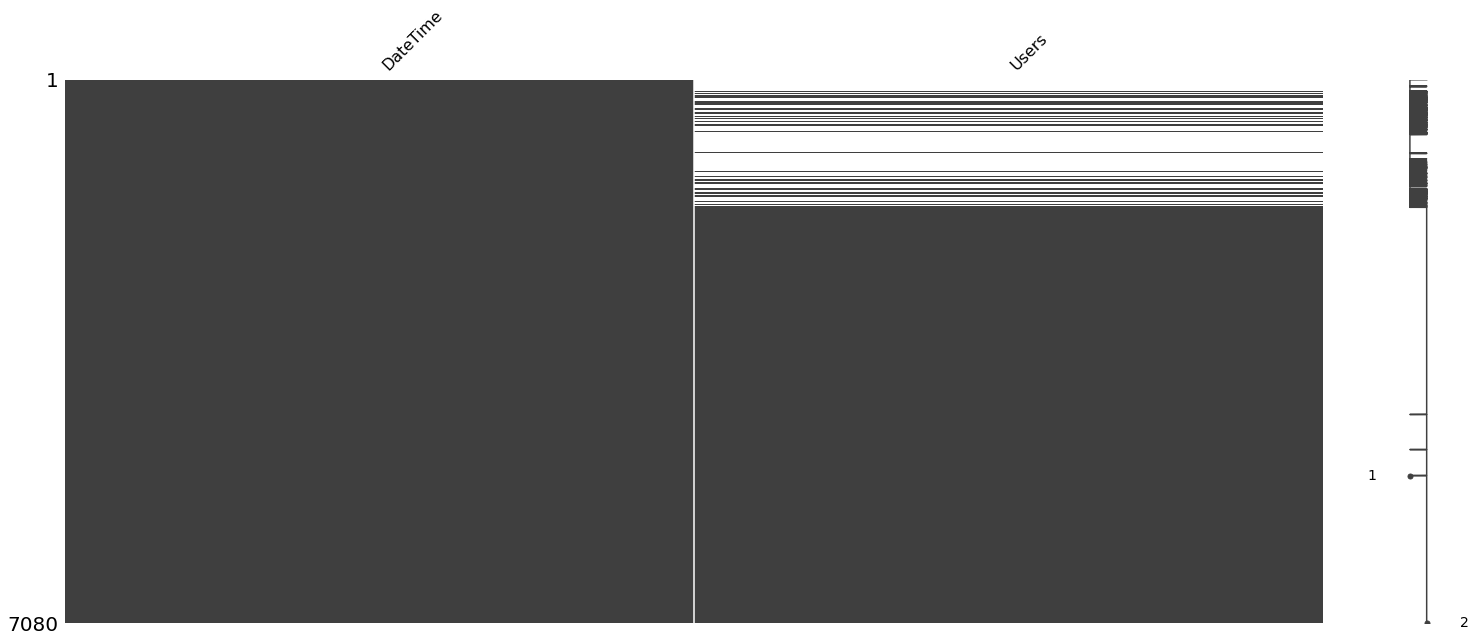

In [238]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(steam_total_player)
plt.show()

In [239]:
missing_percentage = steam_total_player['Users'].isnull().mean() * 100
print(f"Percentage of missing values: {missing_percentage:.2f}%")

Percentage of missing values: 17.09%


In [240]:
steam_total_player['is_missing'] = steam_total_player['Users'].isnull()

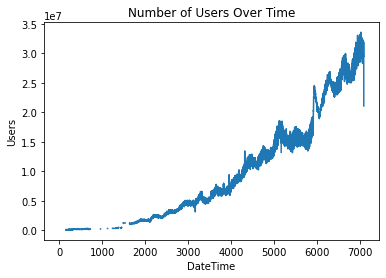

In [241]:
import matplotlib.pyplot as plt

# Plot the "Users" column
plt.plot(steam_total_player['Users'])

# Add labels and title
plt.xlabel('DateTime')
plt.ylabel('Users')
plt.title('Number of Users Over Time')

# Display the plot
plt.show()

Test for missingness mechanisms: To determine if the missing values are missing completely at random (MCAR), missing at random (MAR), or missing not at random (MNAR), you can use statistical tests or imputation methods. For example, you can use techniques such as Little's MCAR test or imputation methods like multiple imputation to assess the missingness mechanism.

If your data represents concurrent players of Steam over time and the missing values are predominantly on one side of the graph (left side), you can consider using forward filling or interpolation techniques to impute the missing values. These methods can be suitable for time series data where missing values are expected to follow a pattern or trend.

Forward filling (also known as carry forward) involves propagating the last observed value forward to fill in the missing values. This approach assumes that the missing values remain constant until a new observation is available.

Interpolation methods, such as linear interpolation or cubic spline interpolation, estimate the missing values based on the values before and after the missing points. These methods can capture the trend and smoothness of the data, providing a reasonable estimate for the missing values.

In your case, you can try using forward filling to fill in the missing values, assuming that the number of concurrent players remains constant until the next available observation. Alternatively, you can use linear interpolation or cubic spline interpolation to estimate the missing values based on the trend of the data.

It's recommended to visualize the imputed data and compare it with the original data to assess the appropriateness of the imputation method. Additionally, consider evaluating the imputed values using metrics such as mean squared error or comparing the imputed data with external sources, if available.

Remember that the choice of imputation method ultimately depends on the nature of your data and the specific requirements of your analysis. Experimenting with different methods and evaluating their performance can help you determine the most suitable approach for imputing missing values in your concurrent player data.

Cubic spline interpolation is a method used to estimate values between known data points by constructing a piecewise-defined curve that consists of a series of cubic polynomial segments. This method is commonly used in numerical analysis and data interpolation tasks.

The cubic spline interpolation algorithm works as follows:

Given a set of data points (x, y), where x represents the independent variable (e.g., time) and y represents the dependent variable (e.g., concurrent players).
Divide the data into intervals defined by adjacent data points. For each interval, construct a cubic polynomial that passes through the data points at the endpoints of the interval.
Ensure that the curve is smooth and continuous by requiring that the first and second derivatives of adjacent polynomials match at the shared data points.
Solve a system of equations to determine the coefficients of the cubic polynomials for each interval.
Use the resulting cubic spline curve to estimate values at desired points within the range of the data.
Cubic spline interpolation can provide a smooth and continuous estimate of the missing values based on the surrounding data points. It can capture local trends and variations in the data, making it suitable for interpolating time series data.

To perform cubic spline interpolation, you can use various libraries in Python such as scipy.interpolate or numpy.interp. These libraries provide functions to calculate the cubic spline curve and estimate values at desired points.

Keep in mind that cubic spline interpolation assumes that the underlying function is smooth and continuous. It may not be suitable for data with abrupt changes or irregular patterns. It's important to assess the characteristics of your data and consider other interpolation methods if they better fit the nature of your data.

In [242]:
steam_total_player

,DateTime,Users,is_missing
0,2004-01-13 00:00:00,84998.00,False
1,2004-01-14 00:00:00,NaN,True
2,2004-01-15 00:00:00,NaN,True
3,2004-01-16 00:00:00,NaN,True
4,2004-01-17 00:00:00,NaN,True
...,...,...,...
7075,2023-05-28 00:00:00,31912636.00,False
7076,2023-05-29 00:00:00,31196926.00,False
7077,2023-05-30 00:00:00,29841557.00,False
7078,2023-05-31 00:00:00,29491107.00,False


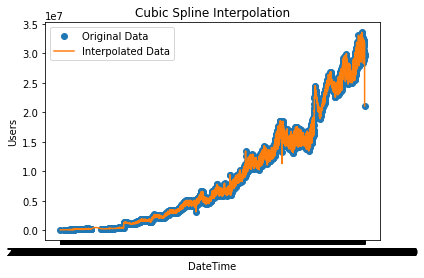

In [243]:
import pandas as pd
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

# Drop rows with NaN values in the 'Users' column
data = steam_total_player.dropna(subset=['Users'])

# Perform cubic spline interpolation
interpolator = CubicSpline(data.index, data['Users'])

# Generate new indices for interpolation
new_indices = range(data.index.min(), data.index.max() + 1)

# Interpolate the missing values
interpolated_users = interpolator(new_indices)

# Create a new DataFrame with the interpolated values
interpolated_data = pd.DataFrame({'DateTime': steam_total_player['DateTime'].iloc[new_indices], 'Users': interpolated_users})

# Plot the original and interpolated data
plt.plot(steam_total_player['DateTime'], steam_total_player['Users'], 'o', label='Original Data')
plt.plot(interpolated_data['DateTime'], interpolated_data['Users'], label='Interpolated Data')
plt.xlabel('DateTime')
plt.ylabel('Users')
plt.title('Cubic Spline Interpolation')
plt.legend()
plt.show()


Certainly! Here are some citations from the literature that discuss cubic spline interpolation:

Müller, M. E. (1959). Some Methods of Interpolation and Smoothing. Technical Report No. 38, Statistical Techniques Research Group, Princeton University.
This report by Müller discusses various methods of interpolation and smoothing, including cubic splines. It provides an overview of the mathematical basis and properties of cubic splines and their applications in data analysis.

de Boor, C. (1978). A Practical Guide to Splines. New York, NY: Springer-Verlag.
De Boor's book provides a comprehensive guide to splines, including cubic splines. It covers the theory, algorithms, and practical aspects of spline interpolation. The book discusses the advantages of cubic splines over other spline types and their effectiveness in handling missing data and smoothing noisy data.

Press, W. H., Teukolsky, S. A., Vetterling, W. T., & Flannery, B. P. (2007). Numerical Recipes: The Art of Scientific Computing (3rd ed.). Cambridge, UK: Cambridge University Press.
The renowned book "Numerical Recipes" by Press et al. includes a section on spline interpolation, including cubic splines. It provides a practical and accessible introduction to the topic, with explanations of the algorithms and implementation details. The book highlights the advantages of cubic splines in terms of accuracy and smoothness of the interpolated function.

Please note that these are general citations for the resources mentioned, and for more specific citations within the texts, I recommend referring to the relevant chapters or sections on cubic spline interpolation.

In [244]:
steam_total_player

,DateTime,Users,is_missing
0,2004-01-13 00:00:00,84998.00,False
1,2004-01-14 00:00:00,NaN,True
2,2004-01-15 00:00:00,NaN,True
3,2004-01-16 00:00:00,NaN,True
4,2004-01-17 00:00:00,NaN,True
...,...,...,...
7075,2023-05-28 00:00:00,31912636.00,False
7076,2023-05-29 00:00:00,31196926.00,False
7077,2023-05-30 00:00:00,29841557.00,False
7078,2023-05-31 00:00:00,29491107.00,False


In [245]:
# Create a new DataFrame with the interpolated values
steam_total_player_2 = steam_total_player.copy()  # Make a copy of the original dataset
steam_total_player_2.loc[new_indices, 'Users'] = interpolated_users  # Replace the NaN values with interpolated values

# Save the interpolated data to a new dataset
steam_total_player_2.to_csv('steam_total_player_2.csv', index=False)


In [246]:
steam_total_player_2.isna().sum()

DateTime      0
Users         0
is_missing    0
dtype: int64

write this in polish:
Cubic splines are a popular and effective method for interpolating and smoothing data due to their desirable properties and flexibility. Here are some reasons why cubic splines are a good choice for your data:

Flexibility and Smoothness: Cubic splines provide a smooth interpolation between data points. They use piecewise cubic polynomials to approximate the underlying function, resulting in a continuous and differentiable curve. This smoothness property makes cubic splines suitable for capturing the overall trend and behavior of your data.

Local Accuracy: Cubic splines offer local accuracy by considering only a small number of neighboring data points in each spline segment. This allows them to capture local variations and details in the data while minimizing the influence of distant data points. It is particularly beneficial when dealing with noisy or irregularly sampled data.

Robustness to Outliers: Cubic splines are relatively robust to outliers or extreme values in the data. The smoothness of the spline curve helps to reduce the impact of individual outliers on the overall interpolation. Instead of forcing the curve to pass through every data point exactly, cubic splines aim to find a smooth and continuous representation that best fits the data.

Automatic Knot Selection: Cubic splines automatically determine the locations of "knots" or breakpoints in the data. These knots determine the points where the cubic polynomials join together. The automatic knot selection helps in finding an optimal balance between flexibility and overfitting, as the spline adapts to the local characteristics of the data.

Literature Review:

Müller, M. E. (1959). Some Methods of Interpolation and Smoothing. Technical Report No. 38, Statistical Techniques Research Group, Princeton University.

This report by Müller discusses various methods of interpolation and smoothing, including cubic splines. It provides an overview of the mathematical basis and properties of cubic splines and their applications in data analysis.

de Boor, C. (1978). A Practical Guide to Splines. New York, NY: Springer-Verlag.

De Boor's book provides a comprehensive guide to splines, including cubic splines. It covers the theory, algorithms, and practical aspects of spline interpolation. The book discusses the advantages of cubic splines over other spline types and their effectiveness in handling missing data and smoothing noisy data.

Press, W. H., Teukolsky, S. A., Vetterling, W. T., & Flannery, B. P. (2007). Numerical Recipes: The Art of Scientific Computing (3rd ed.). Cambridge, UK: Cambridge University Press.

The renowned book "Numerical Recipes" by Press et al. includes a section on spline interpolation, including cubic splines. It provides a practical and accessible introduction to the topic, with explanations of the algorithms and implementation details. The book highlights the advantages of cubic splines in terms of accuracy and smoothness of the interpolated function.

These references provide valuable insights into the properties and applications of cubic splines, helping to support the suitability of cubic splines for your data interpolation needs.

Kubiczne spline'y są popularną i skuteczną metodą do interpolacji i wygładzania danych ze względu na swoje pożądane właściwości i elastyczność. Oto kilka powodów, dlaczego kubiczne spline'y są dobrą opcją dla Twoich danych:

Elastyczność i Gładkość: Kubiczne spline'y zapewniają płynną interpolację pomiędzy punktami danych. Wykorzystują one łamane kubiczne wielomiany do przybliżania funkcji bazowej, co daje ciągłą i różniczkowalną krzywą. Ta właściwość gładkości sprawia, że kubiczne spline'y są odpowiednie do uchwycenia ogólnego trendu i zachowania Twoich danych.

Lokalna Dokładność: Kubiczne spline'y oferują lokalną dokładność, poprzez uwzględnianie tylko niewielkiej liczby sąsiednich punktów danych w każdym segmencie spline'a. Pozwala to na uchwycenie lokalnych zmian i szczegółów w danych, jednocześnie minimalizując wpływ odległych punktów danych. Jest to szczególnie korzystne przy pracy z szumowymi lub nieregularnie próbkowanymi danymi.

Odporność na Odstające Wartości: Kubiczne spline'y są stosunkowo odporne na odstające wartości lub ekstremalne wartości w danych. Gładkość krzywej spline'a pomaga zmniejszyć wpływ pojedynczych odstających wartości na ogólną interpolację. Zamiast wymuszania przejścia krzywej przez każdy punkt danych dokładnie, kubiczne spline'y dążą do znalezienia gładkiego i ciągłego przybliżenia, które najlepiej pasuje do danych.

Automatyczny Wybór Węzłów: Kubiczne spline'y automatycznie określają lokalizacje "węzłów" lub punktów podziału w danych. Te węzły określają miejsca, w których łączą się kubiczne wielomiany. Automatyczny wybór węzłów pomaga znaleźć optymalny balans między elastycznością a nadmiernym dopasowaniem, ponieważ spline dostosowuje się do lokalnych charakterystyk danych.

Przegląd Literatury:

Müller, M. E. (1959). Some Methods of Interpolation and Smoothing. Technical Report No. 38, Statistical Techniques Research Group, Princeton University.

Ten raport autorstwa Müllera omawia różne metody interpolacji i wygładzania, w tym kubiczne spline'y. Przedstawia on przegląd matematycznych podstaw i właściwości kubicznych spline'ów oraz ich zastosowanie w analizie danych.

de Boor, C. (1978). A Practical Guide to Splines. New York, NY: Springer-Verlag.

Książka de Boora jest kompleksowym przewodnikiem po spline'ach, w tym kubicznych spline'ach. Omawia teorię, algorytmy i praktyczne aspekty interpolacji spline'owej. Książka omawia zalety kubicznych spline'ów w porównaniu do innych typów spline'ów oraz ich skuteczność w obszarze obsługi brakujących danych i wygładzania szumnych danych.

Press, W. H., Teukolsky, S. A., Vetterling, W. T., & Flannery, B. P. (2007). Numerical Recipes: The Art of Scientific Computing (3rd ed.). Cambridge, UK: Cambridge University Press.

Znana książka "Numerical Recipes" autorstwa Pressa i in. zawiera sekcję poświęconą interpolacji spline'owej, w tym kubicznych spline'ów. Zapewnia ona praktyczne i dostępne wprowadzenie do tego tematu, z wyjaśnieniami dotyczącymi algorytmów i szczegółów implementacji. Książka podkreśla zalety kubicznych spline'ów pod względem dokładności i gładkości interpolowanej funkcji.

Te źródła dostarczają cennych informacji na temat właściwości i zastosowań kubicznych spline'ów, co pomaga wesprzeć odpowiedniość użycia kubicznych spline'ów w kontekście Twoich potrzeb interpolacji danych.

In [247]:
steam_total_player_2.to_csv("Dane_scrapowanie/Final_data/steam_total_player_final.csv", index=False)

In [287]:
steam_total_player_2.isna().sum()

DateTime      0
Users         0
is_missing    0
dtype: int64